# Setup

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/Data Open Championship 2022

In [ ]:
DATA_DIR = "2-data/IPEDS_Dataset_Encoded"
DATA_EXPORT_DIR = "2-data/preprocessed"

In [ ]:
#!unzip Datathon\ IPEDS\ -\ Final\ Datasets.zip -d 2-data

# Data preprocessing

## Graduation Rates

In [ ]:
df = pd.read_csv(DATA_DIR + "/Graduation Rates/GR_2015-2021_data.csv")
df.shape

(369741, 36)

In [ ]:
df.iloc[:10,:10]

,unitid,grtype,chrtstat,section,cohort,line,grtotlt,grtotlm,grtotlw,graiant
0,100654,"4-year institutions, Adjusted cohort (revised ...",Adjusted cohort (revised cohort minus exclusions),Bachelor's/ equiv + other degree/certif-seeki...,Bachelor's/ equiv + other degree/certif-seeki...,NaN,1222,524.0,698.0,2.0
1,100654,"4-year institutions, Completers within 150% of...",Completers within 150% of normal time,Bachelor's/ equiv + other degree/certif-seeki...,Bachelor's/ equiv + other degree/certif-seeki...,NaN,343,120.0,223.0,0.0
2,100654,"4-year institutions, Transfer-out students",Transfer-out students,Bachelor's/ equiv + other degree/certif-seeki...,Bachelor's/ equiv + other degree/certif-seeki...,NaN,417,163.0,254.0,0.0
3,100654,Bachelor's or equiv subcohort (4-yr institution),Revised cohort,Bachelor's or equiv 2015 subcohort (4-yr insti...,Bachelor's or equiv 2015 subcohort (4-yr inst...,NaN,1222,524.0,698.0,2.0
4,100654,Bachelor's or equiv subcohort (4-yr institutio...,Adjusted cohort (revised cohort minus exclusions),Bachelor's or equiv 2015 subcohort (4-yr insti...,Bachelor's or equiv 2015 subcohort (4-yr inst...,NaN,1222,524.0,698.0,2.0
5,100654,Bachelor's or equiv subcohort (4-yr institutio...,Completers within 150% of normal time,Bachelor's or equiv 2015 subcohort (4-yr insti...,Bachelor's or equiv 2015 subcohort (4-yr inst...,Completers within 150% of normal time,343,120.0,223.0,0.0
6,100654,Bachelor's or equiv subcohort (4-yr institutio...,Completers of bachelor's or equivalent degrees...,Bachelor's or equiv 2015 subcohort (4-yr insti...,Bachelor's or equiv 2015 subcohort (4-yr inst...,Completers of bachelor's or equivalent degrees...,343,120.0,223.0,0.0
7,100654,Bachelor's or equiv subcohort (4-yr institutio...,Completers of bachelor's or equivalent degrees...,Bachelor's or equiv 2015 subcohort (4-yr insti...,Bachelor's or equiv 2015 subcohort (4-yr inst...,NaN,137,34.0,103.0,0.0
8,100654,Bachelor's or equiv subcohort (4-yr institutio...,Completers of bachelor's or equivalent degrees...,Bachelor's or equiv 2015 subcohort (4-yr insti...,Bachelor's or equiv 2015 subcohort (4-yr inst...,NaN,159,66.0,93.0,0.0
9,100654,Bachelor's or equiv subcohort (4-yr institutio...,Completers of bachelor's or equivalent degrees...,Bachelor's or equiv 2015 subcohort (4-yr insti...,Bachelor's or equiv 2015 subcohort (4-yr inst...,NaN,47,20.0,27.0,0.0


In [ ]:
# number of unique institutions by year 
df[['unitid', 'year']].groupby('year').count()

,unitid
year,
2015,57333
2016,55742
2017,54714
2018,51868
2019,50447
2020,50098
2021,49539


In [ ]:
# get unique types
np.unique(df['grtype'])

array(['4-year institutions, Adjusted cohort (revised cohort minus exclusions)',
       '4-year institutions, Completers within 150% of normal time',
       '4-year institutions, No longer enrolled',
       '4-year institutions, Transfer-out students',
       '4-year institutions, noncompleters still enrolled',
       "Bachelor's or equiv subcohort (4-yr institution)",
       "Bachelor's or equiv subcohort (4-yr institution) Completers of bachelor's or equiv degrees in 4 years or less",
       "Bachelor's or equiv subcohort (4-yr institution) Completers of bachelor's or equiv degrees in 5 years",
       "Bachelor's or equiv subcohort (4-yr institution) Completers of bachelor's or equiv degrees in 6 years",
       "Bachelor's or equiv subcohort (4-yr institution) Completers of bachelor's or equiv degrees total (150% of normal time)",
       "Bachelor's or equiv subcohort (4-yr institution) Completers of programs of 2 but <4 yrs (150% of normal time)",
       "Bachelor's or equiv subcoho

In [ ]:
# get template of all ids for each year
df_master = df[['unitid', 'year']].groupby(['year', 'unitid']).first()

In [ ]:
### 4 yr institutions 
df_4yr_total = df[df['grtype']=="Bachelor's or equiv subcohort (4-yr institution)"] # includes exclusions
df_4yr_total = df_master.merge(df_4yr_total, on=["year","unitid"], how="left", validate="one_to_one").set_index(['year','unitid'])

# get each graduation status type 
df_4yr_completer150 = df[df['grtype']=="Bachelor's or equiv subcohort (4-yr institution) Completers within 150% of normal time total"]
#df_4yr_completer150 = df[df['grtype']=="Bachelor's or equiv subcohort (4-yr institution) Completers of bachelor's or equiv degrees total (150% of normal time)"]
df_4yr_transfer = df[df['grtype']=="Bachelor's or equiv subcohort (4-yr institution) Transfer-out students"]
df_4yr_nocompleteren = df[df['grtype']=="Bachelor's or equiv subcohort (4-yr institution) noncompleters still enrolled"]
df_4yr_nocompleter = df[df['grtype']=="Bachelor's or equiv subcohort (4-yr institution), No longer enrolled"]
df_4yr_exclusion = df[df['grtype']=="Bachelor's or equiv subcohort (4-yr institution) exclusions"]

# ensure all dataframes as 
df_4yr_completer150 = df_master.merge(df_4yr_completer150, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_4yr_transfer = df_master.merge(df_4yr_transfer, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_4yr_nocompleteren = df_master.merge(df_4yr_nocompleteren, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_4yr_nocompleter = df_master.merge(df_4yr_nocompleter, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_4yr_exclusion = df_master.merge(df_4yr_exclusion, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
print("Check same:", df_4yr_total.shape[0], df_4yr_completer150.shape[0], df_4yr_transfer.shape[0],
      df_4yr_nocompleteren.shape[0], df_4yr_nocompleter.shape[0])

check = df_4yr_completer150['grtotlt'] + df_4yr_transfer['grtotlt'] + df_4yr_nocompleteren['grtotlt'] + df_4yr_nocompleter['grtotlt'] + df_4yr_exclusion['grtotlt'] 
print("Sums match?", np.sum(df_4yr_total['grtotlt'] == check), df_4yr_total.shape[0] - df_4yr_total['grtype'].isnull().sum())

Check same: 28702 28702 28702 28702 28702
Sums match? 14695 14697


In [ ]:
### 2 yr institutions 
# get template of all ids for each year
df_2yr_total = df[df['grtype']=="Degree/certif-seeking students ( 2-yr institution)"] # includes exclusions
df_2yr_total = df_master.merge(df_2yr_total, on=["year","unitid"], how="left", validate="one_to_one").set_index(['year','unitid'])
print("check duplicates:", df_2yr_total.shape, df_master.shape)

# get each graduation status type 
df_2yr_completer150 = df[df['grtype']=='Degree/certif-seeking students ( 2-yr institution) Completers within 150% of normal time total']
df_2yr_transfer = df[df['grtype']=='Degree/certif-seeking students ( 2-yr institution) Transfer-out students']
df_2yr_nocompleteren = df[df['grtype']=='Degree/certif-seeking students ( 2-yr institution) noncompleters still enrolled']
df_2yr_nocompleter = df[df['grtype']=='Degree/certif-seeking students ( 2-yr institution) No longer enrolled']
df_2yr_exclusion = df[df['grtype']=='Degree/certificate-seeking subcohort(2-yr institution) exclusions']

# ensure all dataframes as 
df_2yr_completer150 = df_master.merge(df_2yr_completer150, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_2yr_transfer = df_master.merge(df_2yr_transfer, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_2yr_nocompleteren = df_master.merge(df_2yr_nocompleteren, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_2yr_nocompleter = df_master.merge(df_2yr_nocompleter, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_2yr_exclusion = df_master.merge(df_2yr_exclusion, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
print("Check same:", df_2yr_total.shape[0], df_2yr_completer150.shape[0], df_2yr_transfer.shape[0],
      df_2yr_nocompleteren.shape[0], df_2yr_nocompleter.shape[0])

check = df_2yr_completer150['grtotlt'] + df_2yr_transfer['grtotlt'] + df_2yr_nocompleteren['grtotlt'] + df_2yr_nocompleter['grtotlt'] + df_2yr_exclusion['grtotlt'] 
print("Sums match?", np.sum(df_2yr_total['grtotlt'] == check), df_2yr_total.shape[0] - df_2yr_total['grtype'].isnull().sum())

check duplicates: (28702, 34) (28702, 0)
Check same: 28702 28702 28702 28702 28702
Sums match? 12186 12186


In [ ]:
### other degree 4yr institutions 
# get template of all ids for each year
df_other_total = df[df['grtype']=="Other degree/certif-seeking subcohort (4-yr institution)"] # includes exclusions
df_other_total = df_master.merge(df_other_total, on=["year","unitid"], how="left", validate="one_to_one").set_index(['year','unitid'])

print("check duplicates:", df_other_total.shape, df_master.shape)

# get each graduation status type 
df_other_completer150 = df[df['grtype']=='Other degree/certif-seeking subcohort (4-yr institution) Completers within 150% of normal time total']
df_other_transfer = df[df['grtype']=='Other degree/certif-seeking subcohort (4-yr institution) Transfer-out students']
df_other_nocompleteren = df[df['grtype']=='Other degree/certif-seeking subcohort (4-yr institution) noncompleters still enrolled']
df_other_nocompleter = df[df['grtype']=='Other degree/certif-seeking subcohort (4-yr institution) No longer enrolled']
df_other_exclusion = df[df['grtype']=='Other degree/certificate-seeking subcohort(4-yr institution) exclusions']

# ensure all dataframes as 
df_other_completer150 = df_master.merge(df_other_completer150, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_other_transfer = df_master.merge(df_other_transfer, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_other_nocompleteren = df_master.merge(df_other_nocompleteren, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_other_nocompleter = df_master.merge(df_other_nocompleter, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
df_other_exclusion = df_master.merge(df_other_exclusion, on=["year","unitid"], how="left", validate="one_to_one").replace(np.nan,0).set_index(['year','unitid'])
print("Check same:", df_other_total.shape[0], df_other_completer150.shape[0], df_other_transfer.shape[0],
      df_other_nocompleteren.shape[0], df_other_nocompleter.shape[0])

check = df_other_completer150['grtotlt'] + df_other_transfer['grtotlt'] + df_other_nocompleteren['grtotlt'] + df_other_nocompleter['grtotlt'] + df_other_exclusion['grtotlt'] 
print("Sums match?", np.sum(df_other_total['grtotlt'] == check), df_other_total.shape[0]- df_other_total['grtype'].isnull().sum())


check duplicates: (28702, 34) (28702, 0)
Check same: 28702 28702 28702 28702 28702
Sums match? 7017 7017


In [ ]:
df_4yr_total.columns

Index(['grtype', 'chrtstat', 'section', 'cohort', 'line', 'grtotlt', 'grtotlm',
       'grtotlw', 'graiant', 'graianm', 'graianw', 'grasiat', 'grasiam',
       'grasiaw', 'grbkaat', 'grbkaam', 'grbkaaw', 'grhispt', 'grhispm',
       'grhispw', 'grnhpit', 'grnhpim', 'grnhpiw', 'grwhitt', 'grwhitm',
       'grwhitw', 'gr2mort', 'gr2morm', 'gr2morw', 'grunknt', 'grunknm',
       'grunknw', 'grnralt', 'grnralm'],
      dtype='object')

In [ ]:
columns = ['grtotlt', 'grtotlm', 'grtotlw', 'grbkaat', 'grhispt', 'grwhitt', 'grasiat']
names = ['', 'men', 'women', 'black', 'hispanic', 'white', 'asian']

for i in range(len(columns)):
  df_master['gradrate_4yr_total_' + names[i]] = df_4yr_total[columns[i]]
  df_master['gradrate_4yr_completer150_' + names[i]] = df_4yr_completer150[columns[i]] / df_4yr_total[columns[i]]
  df_master['gradrate_4yr_transfer_' + names[i]] = df_4yr_transfer[columns[i]] / df_4yr_total[columns[i]]
  df_master['gradrate_4yr_nocompleteren_' + names[i]] = df_4yr_nocompleteren[columns[i]] / df_4yr_total[columns[i]]
  df_master['gradrate_4yr_nocompleter_' + names[i]] = df_4yr_nocompleter[columns[i]] / df_4yr_total[columns[i]]

  df_master['gradrate_2yr_total_' + names[i]] = df_2yr_total[columns[i]]
  df_master['gradrate_2yr_completer150_' + names[i]] = df_2yr_completer150[columns[i]] / df_2yr_total[columns[i]]
  df_master['gradrate_2yr_transfer_' + names[i]] = df_2yr_transfer[columns[i]] / df_2yr_total[columns[i]]
  df_master['gradrate_2yr_nocompleteren_' + names[i]] = df_2yr_nocompleteren[columns[i]] / df_2yr_total[columns[i]]
  df_master['gradrate_2yr_nocompleter_' + names[i]] = df_2yr_nocompleter[columns[i]] / df_2yr_total[columns[i]]

  df_master['gradrate_other_total_' + names[i]] = df_other_total[columns[i]]
  df_master['gradrate_other_completer150_' + names[i]] = df_other_completer150[columns[i]] / df_other_total[columns[i]]
  df_master['gradrate_other_transfer_' + names[i]] = df_other_transfer[columns[i]] / df_other_total[columns[i]]
  df_master['gradrate_other_nocompleteren_' + names[i]] = df_other_nocompleteren[columns[i]] / df_other_total[columns[i]]
  df_master['gradrate_other_nocompleter_' + names[i]] = df_other_nocompleter[columns[i]] / df_other_total[columns[i]]


<ipython-input-15-b4fe9dab1c2a>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_master['gradrate_other_total_' + names[i]] = df_other_total[columns[i]]
<ipython-input-15-b4fe9dab1c2a>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_master['gradrate_other_completer150_' + names[i]] = df_other_completer150[columns[i]] / df_other_total[columns[i]]
<ipython-input-15-b4fe9dab1c2a>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

In [ ]:
n_4yr = df_master.shape[0] - df_master['gradrate_4yr_total_'].isnull().sum()
n_2yr = df_master.shape[0] - df_master['gradrate_2yr_total_'].isnull().sum()
n_other = df_master.shape[0] - df_master['gradrate_other_total_'].isnull().sum()
labels = ["Bachelor's or equiv subcohort (4-yr institution) (N="+str(n_4yr)+")",
          "Degree/certif-seeking students (2-yr institution) (N="+str(n_2yr)+")",
          "Other degree/certif-seeking subcohort (4-yr institution) (N="+str(n_other)+")"]

In [ ]:
df_master.to_csv(DATA_EXPORT_DIR + "/df_gradrate1.csv")

## University characteristics

In [ ]:
df = pd.read_csv(DATA_DIR + "/Institutional Characteristics/HD_2015-2021_data.csv")
df_ic = pd.read_csv(DATA_DIR + "/Institutional Characteristics/IC_2015-2021_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,23,48,49,50,51,52,53,54,70,71,74,75,76,77,78,79,80,81,82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,13,40,63,64,65,66,67,68,69,75,76,77,78,79,80,81,82,114,115) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.iloc[:10,:10]

,unitid,instnm,ialias,addr,city,stabbr,zip,fips,obereg,chfnm
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,Alabama,35762,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...","Dr. Andrew Hugine, Jr."
1,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,Alabama,35294-0110,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Ray L. Watts
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,Alabama,36117-3553,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Michael C.Turner
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,Alabama,35899,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Darren Dawson
4,100724,Alabama State University,NaN,915 S Jackson Street,Montgomery,Alabama,36104-0271,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Quinton T. Ross
5,100733,University of Alabama System Office,NaN,500 University Blvd. East,Tuscaloosa,Alabama,35401,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Finis St. John IV
6,100751,The University of Alabama,NaN,739 University Blvd,Tuscaloosa,Alabama,35487-0100,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Dr. Stuart R. Bell
7,100760,Central Alabama Community College,NaN,1675 Cherokee Rd,Alexander City,Alabama,35010,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Jeff Lynn
8,100812,Athens State University,NaN,300 N Beaty St,Athens,Alabama,35611,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Dr. Philip Way
9,100830,Auburn University at Montgomery,AUM||Auburn University at Montgomery|Auburn Mo...,7440 East Drive,Montgomery,Alabama,36117-3596,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Carl A. Stockton


In [ ]:
df_2021 = df[df['year']==2021]
df_ic_2021 = df_ic[df_ic['year']==2021]

In [ ]:
df_2021[['unitid','act']].groupby('act').count()

,unitid
act,
Active - institution active,6105
Closed in current year (active has data),33
Combined with other institution,14
Delete out of business,64
New (active) - added during the current year,52
"Perfect child campus - data reported with main campus, but is listed on college navigator",17
Restore (active) - restored to the current universe,4


In [ ]:
df[['unitid','carnegie']].groupby('carnegie').count()

,unitid
carnegie,
Associates Colleges,8816
Baccalaureate Colleges--General,2067
Baccalaureate Colleges--Liberal Arts,1514
Baccalaureate/Associates Colleges,298
Doctoral/Research Universities--Extensive,1058
Doctoral/Research Universities--Intensive,743
Masters Colleges and Universities I,3362
Masters Colleges and Universities II,742
Medical schools and medical centers,293


In [ ]:
df_2021[['unitid', 'deggrant']].groupby('deggrant').count()

,unitid
deggrant,
Degree-granting,4177
"Nondegree-granting, primarily postsecondary",2096


In [ ]:
df_2021[['unitid', 'cyactive']].groupby('cyactive').count()

,unitid
cyactive,
"No, closed, combined, or out-of-scope",95
Yes,6194


In [ ]:
df_2021[['unitid', 'instcat']].groupby('instcat').count()

,unitid
instcat,
"Degree-granting, associate's and certificates",1306
"Degree-granting, graduate with no undergraduate degrees",297
"Degree-granting, not primarily baccalaureate or above",426
"Degree-granting, primarily baccalaureate or above",2026
"Nondegree-granting, above the baccalaureate",5
"Nondegree-granting, sub-baccalaureate",2044


In [ ]:
df_2021[['unitid', 'hloffer']].groupby('hloffer').count()

,unitid
hloffer,
Associate's degree,1108
"At least 1, but less than 2 academic yrs",1611
"At least 2, but less than 4 academic yrs",531
Award of less than one academic year,178
Bachelor's degree,702
Doctor's degree,1254
Master's degree,719
Post-master's certificate,158
Postbaccalaureate certificate,12


In [ ]:
df_2021[['unitid', 'instcat']].groupby('instcat').count()

,unitid
instcat,
"Degree-granting, associate's and certificates",1306
"Degree-granting, graduate with no undergraduate degrees",297
"Degree-granting, not primarily baccalaureate or above",426
"Degree-granting, primarily baccalaureate or above",2026
"Nondegree-granting, above the baccalaureate",5
"Nondegree-granting, sub-baccalaureate",2044


In [ ]:
df_2021[['unitid', 'control']].groupby('control').count()

,unitid
control,
Private for-profit,2411
Private not-for-profit,1868
Public,1994


In [ ]:
df_2021[['unitid', 'locale']].groupby('locale').count()

,unitid
locale,
City: Large,1484
City: Midsize,754
City: Small,810
Rural: Distant,112
Rural: Fringe,350
Rural: Remote,61
Suburb: Large,1531
Suburb: Midsize,185
Suburb: Small,131


In [ ]:
df_2021[['unitid', 'instsize']].groupby('instsize').count()

,unitid
instsize,
"1,000 - 4,999",1564
"10,000 - 19,999",295
"20,000 and above",198
"5,000 - 9,999",477
"Under 1,000",3569


In [ ]:
df_2021[['unitid', 'landgrnt']].groupby('landgrnt').count()

,unitid
landgrnt,
Land Grant Institution,123
Not a Land Grant Institution,6166


In [ ]:
df_ic_2021[['unitid', 'distnced']].groupby('distnced').count()

,unitid
distnced,
No,6034
Not applicable,71
Not reported,12
Yes,62


In [ ]:
# apply exclusions
keep = [
    "Associates Colleges",
    "Baccalaureate Colleges--General",
    "Baccalaureate Colleges--Liberal Arts",
    "Baccalaureate/Associates Colleges",
    "Doctoral/Research Universities--Extensive",
    "Doctoral/Research Universities--Intensive",
    "Masters Colleges and Universities I",
    "Masters Colleges and Universities II"
]
df_2021 = df_2021[df_2021['act']=="Active - institution active"]
df_2021 = df_2021[df_2021['deggrant']=="Degree-granting"]
df_2021 = df_2021[df_2021['carnegie'].isin(keep)]
print(df_2021.shape, df_2021['unitid'].unique().shape)

df_ic_2021 = df_2021[['unitid']].merge(df_ic_2021, on="unitid", how="left")
df_ic_2021 = df_ic_2021[(df_ic_2021['distnced']=="No") | (df_ic_2021['distnced']=="Not applicable")] 

df_2021 = df_ic_2021[['unitid']].merge(df_2021, on="unitid", how="left")
print(df_ic_2021.shape, df_2021['unitid'].unique().shape)

(2517, 85) (2517,)
(2511, 117) (2511,)


In [ ]:
# get cols of interest
map = dict({
    "Yes":1, 
    "No":0, 
    "Not applicable": np.nan,
    "Implied no": 0
})
map_urban = dict({
    "City: Large": 4,
    "City: Midsize": 4,
    "City: Small": 4,
    "Rural: Distant": 1,
    "Rural: Fringe": 1,
    "Rural: Remote": 1,
    "Suburb: Large": 2,
    "Suburb: Midsize": 2,
    "Suburb: Small": 2,
    "Town: Distant": 3,
    "Town: Fringe": 3,
    "Town: Remote": 3,
})
map_instsize = dict({
    "1,000 - 4,999": 2,
    "10,000 - 19,999": 4,
    "20,000 and above": 5,
    "5,000 - 9,999": 3, 
    "Under 1,000": 1,
})
map_disab = dict({
    "3 percent or less": 1,
    "More than 3 percent": 2,
    "Not applicable": 0,
    "Not reported": 0

})
map_religion_no = dict({
    "Not applicable": 1
})
map_landgrant = dict({
    "Land Grant Institution": 1,
    "Not a Land Grant Institution":0

})
df_final = df_2021[['unitid', 'instnm','ialias','stabbr','zip', 'obereg', 'iclevel', 'control',
               'ugoffer','groffer', 'hloffer', 'rptmth','instcat', 'f1systyp']]

df_final['diversity_historicallyblackcollege'] = df_2021['hbcu'].map(map, na_action="ignore")
df_final['diversity_tribal'] = df_2021['tribal'].map(map, na_action="ignore")
df_final['diversity_disab'] = df_ic_2021['disab'].map(map_disab, na_action="ignore") # could use disabpct to get numbers 

df_final['services_hospital'] = df_2021['hospital'].map(map, na_action="ignore")
df_final['charac_medical'] = df_2021['medical'].map(map, na_action="ignore")

df_final['charac_urban'] = df_2021['locale'].map(map_urban, na_action="ignore") 
df_final['charac_landgrant'] = df_2021['landgrnt'].map(map_landgrant, na_action="ignore")
df_final['charac_instsize'] = df_2021['instsize'].map(map_instsize, na_action="ignore")
df_final['charac_openadmission'] = df_ic_2021['openadmp'].map(map)
df_final['diversity_veteranprograms'] = np.minimum(df_ic_2021['vet1'].map(map) + \
                                      df_ic_2021['vet2'].map(map) + \
                                      df_ic_2021['vet3'].map(map) + \
                                      df_ic_2021['vet4'].map(map) + \
                                      df_ic_2021['vet5'].map(map), 1)
df_final['diversity_athleticprograms'] = np.minimum(df_ic_2021['athassoc'].map(map) + \
                                      df_ic_2021['sport1'].map(map) + \
                                      df_ic_2021['sport2'].map(map) + \
                                      df_ic_2021['sport3'].map(map) + \
                                      df_ic_2021['sport4'].map(map), 1)

df_final['charac_religion_no'] = df_ic_2021['relaffil'].map(map_religion_no)

df_final['speclearning_distancecourse'] = df_ic_2021['distcrs'].map(map, na_action="ignore")
df_final['speclearning_distancepogram'] = df_ic_2021['distpgs'].map(map, na_action="ignore")
df_final['speclearning_distanceonly'] = df_ic_2021['distnced'].map(map, na_action="ignore")

df_final['speclearning_parttime'] = df_ic_2021['pt_ug'].map(map, na_action="ignore")
df_final['speclearning_studyabroad'] = df_ic_2021['slo6'].map(map, na_action="ignore")
df_final['speclearning_eveningcollege'] = df_ic_2021['slo7'].map(map, na_action="ignore")
df_final['speclearning_rotc'] = df_ic_2021['slo5'].map(map, na_action="ignore")

df_final['services_remedial'] = df_ic_2021['stusrv1'].map(map, na_action="ignore")
df_final['services_counseling'] = df_ic_2021['stusrv2'].map(map, na_action="ignore")
df_final['services_employment'] = df_ic_2021['stusrv3'].map(map, na_action="ignore")
df_final['services_placement'] = df_ic_2021['stusrv4'].map(map, na_action="ignore")
df_final['services_daycare'] = df_ic_2021['stusrv8'].map(map, na_action="ignore")
df_final['services_library'] = np.abs(df_ic_2021['libres9'].map(map, na_action="ignore") - 1)
df_final['services_library_physical'] = df_ic_2021['libres1'].map(map, na_action="ignore")
df_final['services_library_digital'] = df_ic_2021['libres3'].map(map, na_action="ignore")

df_final['housing_requiredlivecampus'] = df_ic_2021['alloncam'].map(map, na_action="ignore")
df_final['housing_providedroom'] = df_ic_2021['room'].map(map, na_action="ignore")
df_final['housing_roomcapacity'] = df_ic_2021['roomcap'] # need normalize by capacity
df_final['housing_providedmeal'] = df_ic_2021['board'].map(map, na_action="ignore")

<ipython-input-441-cd089c0b3409>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['diversity_historicallyblackcollege'] = df_2021['hbcu'].map(map, na_action="ignore")
<ipython-input-441-cd089c0b3409>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['diversity_tribal'] = df_2021['tribal'].map(map, na_action="ignore")
<ipython-input-441-cd089c0b3409>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
# test
df_final[['unitid', 'speclearning_distanceonly']].groupby('speclearning_distanceonly').count()

,unitid
speclearning_distanceonly,
0.0,2504


In [ ]:
df_final.isnull().sum()

unitid                                   0
instnm                                   0
ialias                                1365
stabbr                                   0
zip                                      0
obereg                                   0
iclevel                                  0
control                                  0
ugoffer                                  0
groffer                                  0
hloffer                                  0
rptmth                                   1
instcat                                  1
f1systyp                                 0
diversity_historicallyblackcollege       0
diversity_tribal                         0
diversity_disab                          6
services_hospital                      874
charac_medical                           1
charac_urban                             3
charac_landgrant                         0
charac_instsize                          1
charac_openadmission                    27
diversity_v

In [ ]:
#df_final.loc[~df['hloffer'].isnull(), 'hloffer_doctor'] = (df.loc[~df['hloffer'].isnull(), 'hloffer'] == "Doctor's degree") 
#print("check missing:", df_final['hloffer_doctor'].isnull().sum())
print(df_final.shape)

(2511, 45)


In [ ]:
df_final.to_csv(DATA_EXPORT_DIR + "/df_institutional_master.csv")

## University characteristics fees

In [ ]:
df_institution_master = pd.read_csv(DATA_EXPORT_DIR + "/df_institutional_master.csv")
df_institution_master = df_institution_master[['unitid']]
df_institution_master.shape

(4039, 1)

In [ ]:
df_ic = pd.read_csv(DATA_DIR + "/Institutional Characteristics/IC_2015-2021_data.csv")
df_ay = pd.read_csv(DATA_DIR + "/Institutional Characteristics/IC_AY_2015-2021_data.csv")
#df_py = pd.read_csv(DATA_DIR + "/Institutional Characteristics/IC_PY_2015-2021_data.csv") # not interested now, vocational programs 
print(df_ay.shape)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,13,40,63,64,65,66,67,68,69,75,76,77,78,79,80,81,82,114,115) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(29185, 121)


In [ ]:
df_ay.replace(".", np.nan, inplace=True)

,unitid,tuition1,fee1,hrchg1,tuition2,fee2,hrchg2,tuition3,fee3,hrchg3,...,chg7ay2,chg7ay3,chg8ay0,chg8ay1,chg8ay2,chg8ay3,chg9ay0,chg9ay1,chg9ay2,year
0,100654.0,8610.0,1414.0,287.0,8610.0,1414.0,287.0,17220.0,1414.0,574.0,...,9240.0,9520.0,2990.0,3090.0,3090.0,3090.0,2990.0,3090.0,3440.0,2021.0
1,100663.0,8568.0,0.0,357.0,8568.0,0.0,357.0,20400.0,0.0,850.0,...,12307.0,12307.0,4886.0,5555.0,5555.0,5555.0,4886.0,5555.0,5555.0,2021.0
2,100690.0,9000.0,950.0,430.0,9000.0,950.0,430.0,9000.0,950.0,430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
3,100706.0,9730.0,1758.0,427.0,9730.0,1758.0,427.0,22126.0,1758.0,978.0,...,10652.0,10764.0,3808.0,3994.0,4076.0,4156.0,3808.0,3994.0,4076.0,2021.0
4,100724.0,8328.0,2740.0,347.0,8328.0,2740.0,347.0,16656.0,2740.0,694.0,...,7320.0,7320.0,4228.0,4228.0,4228.0,5130.0,4228.0,4228.0,4228.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29180,487463.0,13480.0,1828.0,NaN,13480.0,1828.0,NaN,13480.0,1828.0,NaN,...,19845.0,9594.0,12150.0,12750.0,12750.0,8163.0,12150.0,12750.0,12750.0,2015.0
29181,487524.0,15660.0,400.0,522.0,15660.0,400.0,522.0,15660.0,400.0,522.0,...,9900.0,7000.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2015.0
29182,487603.0,9500.0,387.0,327.0,9500.0,387.0,327.0,9500.0,387.0,327.0,...,6800.0,6800.0,2050.0,2050.0,2050.0,2050.0,2690.0,2690.0,2690.0,2015.0
29183,487658.0,17723.0,0.0,NaN,17723.0,0.0,NaN,17723.0,0.0,NaN,...,12796.0,12796.0,1080.0,1080.0,1080.0,1080.0,1296.0,1296.0,1296.0,2015.0


In [ ]:
# check if any duplicates of id + year (did this in excel)

# get IDs only in the list we want 
df_ay = df_institution_master.merge(df_ay, on="unitid", how="left")
print(df_ay.shape)
#df_ay['year'] = df_ay['year'].astype(int)

(25601, 121)


In [ ]:
cols = [
 'tuition1',
 'fee1',
 'hrchg1',
 'tuition2',
 'fee2',
 'hrchg2',
 'tuition3',
 'fee3',
 'hrchg3',
 'tuition5',
 'fee5',
 'hrchg5',
 'tuition6',
 'fee6',
 'hrchg6',
 'tuition7',
 'fee7',
 'hrchg7',
 'chg3tgtd',
 'chg3fgtd',
 'chg4ay3', # books and supplies for the NEXT year
 'chg3ay3', # on campus room and board 
 'chg6ay3', # on campus other
  'chg7ay3', # off campus room and board  
  'chg8ay3', # off campus other 
 ]


df_final = df_ay[['year','unitid'] + cols]
print(df_final.shape)

df_final.columns = ['year', 'unitid'] + ["fee_" + col for col in cols]
df_final.iloc[:10,:10]

(25601, 27)


,year,unitid,fee_tuition1,fee_fee1,fee_hrchg1,fee_tuition2,fee_fee2,fee_hrchg2,fee_tuition3,fee_fee3
0,2021.0,100654,8610,1414,287,8610,1414,287,17220,1414
1,2020.0,100654,8610,1414,287,8610,1414,287,17220,1414
2,2019.0,100654,8610,1414,287,8610,1414,287,17220,1414
3,2018.0,100654,8610,1134,287,8610,1134,287,17220,1134
4,2017.0,100654,8379,1478,274,8379,1478,274,16758,1478
5,2016.0,100654,8130,1236,271,8130,1236,271,16260,1236
6,2015.0,100654,7770,1596,259,7770,1596,259,15540,1596
7,2021.0,100663,8568,0,357,8568,0,357,20400,0
8,2020.0,100663,8568,0,357,8568,0,357,20400,0
9,2019.0,100663,8568,0,357,8568,0,357,20400,0


In [ ]:
#t = df_ic[['unitid', 'year']].groupby('unitid').count()

In [ ]:
#t.columns = ['number of years']
#t[t<7].sum()

In [ ]:
map = dict({
    "Yes":1, 
    "No":0, 
    "Not applicable": np.nan,
    "Implied no": 0
})

df_ic['fee_room'] = df_ic['roomamt'].astyepe(int)
df_ic['fee_board'] = df_ic['boardamt'].astyepe(int)
df_ic['fee_applicationunderg'] = df_ic['applfeeu'].astyepe(int)
df_ic['fee_applicationgrad'] = df_ic['applfeeg'].astyepe(int)
df_ic['fee_tuitionalternativeplan'] = df_ic['tuitpl'].map(map)
df_ic['fee_tuitionvary'] = df_ic['tuitvary'].map(map)

df_final = df_final.merge(df_ic[['unitid', 'year', "fee_applicationunderg", "fee_applicationgrad", "fee_tuitionalternativeplan", "fee_tuitionvary"]],
                          on=["year", "unitid"], how="left")
print(df_final.shape)

AttributeError: ignored

In [ ]:
df_final.isnull().sum()

year              347
unitid              0
fee_tuition1     2238
fee_fee1         2238
fee_hrchg1       4350
fee_tuition2     2238
fee_fee2         2238
fee_hrchg2       4350
fee_tuition3     2238
fee_fee3         2238
fee_hrchg3       4190
fee_tuition5    12408
fee_fee5        12406
fee_hrchg5      13268
fee_tuition6    12408
fee_fee6        12406
fee_hrchg6      13268
fee_tuition7    12408
fee_fee7        12406
fee_hrchg7      13108
fee_chg3tgtd    24549
fee_chg3fgtd    25137
fee_chg4ay3      3186
fee_chg3ay3      2869
fee_chg6ay3     12063
fee_chg7ay3      3406
fee_chg8ay3      3406
dtype: int64

In [ ]:
df_final.to_csv(DATA_EXPORT_DIR + "/df_student_fee.csv")

## Get relative datasets

In [ ]:
df_master = pd.read_csv(DATA_EXPORT_DIR + "/df_institutional_master.csv", index_col=0)
df_master.shape

(2511, 45)

In [ ]:
df_unique = df_master[['unitid']].set_index('unitid', verify_integrity=True).sort_index()
df_unique_forpro = df_master[df_master['control'] == "Private for-profit"][['unitid']].set_index('unitid', verify_integrity=True).sort_index()
df_unique_nonpro = df_master[df_master['control'] == "Private not-for-profit"][['unitid']].set_index('unitid', verify_integrity=True).sort_index()
df_unique_pub = df_master[df_master['control'] == "Public"][['unitid']].set_index('unitid', verify_integrity=True).sort_index()
print(df_unique.shape, df_unique_forpro.shape, df_unique_pub.shape, df_unique_nonpro.shape)

(2511, 0) (144, 0) (1439, 0) (928, 0)


In [ ]:
df_master[['unitid', 'iclevel']].groupby("iclevel").count()

,unitid
iclevel,
At least 2 but less than 4 years,861
Four or more years,1650


In [ ]:
df_master[['unitid', 'control']].groupby("control").count()

,unitid
control,
Private for-profit,144
Private not-for-profit,928
Public,1439


In [ ]:
def convert_df_to_relative(df):
    df_rel = pd.DataFrame(index=df['unitid'].unique()).sort_index()
    years = np.unique(df['year']).tolist()
    print(years) 

    for prev_year in years[:-1]:
      df_prev_year = df[df['year']==prev_year]
      df_prev_year = df_unique.merge(df_prev_year, on="unitid", how="left")
      df_prev_year = df_prev_year.set_index('unitid', verify_integrity=True).sort_index().drop("year", axis=1)
      
      df_this_year = df[df['year']==prev_year+1]
      df_this_year = df_unique.merge(df_this_year, on="unitid", how="left")
      df_this_year = df_this_year.set_index('unitid', verify_integrity=True).sort_index().drop("year", axis=1)

      assert df_prev_year.shape == df_this_year.shape, "shapes do not match"

      cols = [col + "_" + str( int(prev_year % 2000)) + str( int(prev_year % 2000 + 1)) \
              if col[-1] != "_" else col + str(int(prev_year % 2000)) + str(int(prev_year % 2000 + 1)) \
              for col in df_prev_year.columns]
      t = pd.DataFrame(np.divide(df_this_year - df_prev_year, df_prev_year + 1e-8), index=df_prev_year.index)
      t[t>1] = np.nan
      df_rel[cols] = t
      
    return df_rel 

In [ ]:
def convert_by_control(df, export_path=""):

  if isinstance(df, list):
      assert len(df) == 3
      print("Before:", df[0].shape, df[1].shape, df[2].shape)
      df_forpro = df_unique_forpro.merge(df[0], on="unitid", how="left")
      df_nonpro = df_unique_nonpro.merge(df[1], on="unitid", how="left")
      df_pub = df_unique_pub.merge(df[2], on="unitid", how="left")

  else:
      print("Before:", df.shape)
      df_forpro = df_unique_forpro.merge(df, on="unitid", how="left")
      df_nonpro = df_unique_nonpro.merge(df, on="unitid", how="left")
      df_pub = df_unique_pub.merge(df, on="unitid", how="left")

  if export_path != "":
      df_forpro.to_csv(DATA_EXPORT_DIR + export_path + "_forpro.csv")
      df_nonpro.to_csv(DATA_EXPORT_DIR + export_path + "_nonpro.csv")
      df_pub.to_csv(DATA_EXPORT_DIR + export_path + "_pub.csv")
  
  print("After:", df_forpro.shape, df_nonpro.shape, df_pub.shape)
  return df_forpro, df_nonpro, df_pub

### gradrate

In [ ]:
df_gradrate = pd.read_csv(DATA_EXPORT_DIR + "/df_gradrate1.csv")
print(df_gradrate.shape)
df_gradrate = df_unique.merge(df_gradrate, on="unitid", how="left")
print(df_gradrate.shape)

(28702, 107)
(17416, 107)


In [ ]:
df_gradrate_rel = convert_df_to_relative(df_gradrate)

[2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, nan]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [ ]:
df_gradrate[df_gradrate['year']==2015].isnull().sum()

unitid                                   0
year                                     0
gradrate_4yr_total_                   1045
gradrate_4yr_completer150_            1045
gradrate_4yr_transfer_                1045
                                      ... 
gradrate_other_total_asian            1971
gradrate_other_completer150_asian     2220
gradrate_other_transfer_asian         2220
gradrate_other_nocompleteren_asian    2220
gradrate_other_nocompleter_asian      2220
Length: 107, dtype: int64

In [ ]:
df_gradrate_rel.loc[:, df_gradrate_rel.columns[df_gradrate_rel.columns.str.startswith("gradrate_4yr")]].isnull().sum()

gradrate_4yr_total_1516                  1100
gradrate_4yr_completer150_1516           1088
gradrate_4yr_transfer_1516               1246
gradrate_4yr_nocompleteren_1516          1325
gradrate_4yr_nocompleter_1516            1135
                                         ... 
gradrate_4yr_total_asian_2122            2511
gradrate_4yr_completer150_asian_2122     2511
gradrate_4yr_transfer_asian_2122         2511
gradrate_4yr_nocompleteren_asian_2122    2511
gradrate_4yr_nocompleter_asian_2122      2511
Length: 245, dtype: int64

In [ ]:
df_gradrate_rel['unitid'] = df_gradrate_rel.index
df_gradrate_forpro, df_gradrate_nonpro, df_gradrate_pub = convert_by_control(df_gradrate, "/absolute/archive/df_gradrate")
df_gradrate_forpro_rel, df_gradrate_nonpro_rel, df_gradrate_pub_rel = convert_by_control(df_gradrate_rel, "/relative/archive/df_gradrate")

Before: (17416, 107)
After: (1000, 107) (6407, 107) (10009, 107)
Before: (2511, 736)
After: (144, 736) (928, 736) (1439, 736)


### student fee

In [ ]:
df_fee = pd.read_csv(DATA_EXPORT_DIR + "/df_student_fee.csv", index_col=0)
print(df_fee.shape)

(25601, 27)


In [ ]:
df_fee = df_fee[~df_fee['year'].isnull()]

In [ ]:
df_fee_rel = convert_df_to_relative(df_fee)

[2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0]


In [ ]:
df_fee_rel.isnull().sum()

fee_tuition1_1516    1233
fee_fee1_1516        1287
fee_hrchg1_1516      1327
fee_tuition2_1516    1233
fee_fee2_1516        1291
                     ... 
fee_chg4ay3_2021     1282
fee_chg3ay3_2021     1247
fee_chg6ay3_2021     2104
fee_chg7ay3_2021     1304
fee_chg8ay3_2021     1309
Length: 150, dtype: int64

In [ ]:
df_fee_rel['unitid'] = df_fee_rel.index
_,_,_ = convert_by_control(df_fee, "/absolute/archive/df_fee")
_,_,_ = convert_by_control(df_fee_rel, "/relative/archive/df_fee")

Before: (25254, 27)
After: (777, 27) (6484, 27) (10060, 27)
Before: (3692, 151)
After: (144, 151) (928, 151) (1439, 151)


### Finances

In [ ]:
df_finance_forpro = pd.read_csv(DATA_EXPORT_DIR + "/forpro_inst_fin_cleaned.csv", index_col=0)
df_finance_nonpro = pd.read_csv(DATA_EXPORT_DIR + "/nonpro_inst_fin_cleaned.csv", index_col=0)
df_finance_pub = pd.read_csv(DATA_EXPORT_DIR + "/pub_inst_fin_cleaned.csv", index_col=0)
print(df_finance_forpro.shape, df_finance_nonpro.shape, df_finance_pub.shape)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (130) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(15352, 158) (11198, 230) (11824, 208)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (177) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_finance_forpro.drop('year', axis=1, inplace=True)
df_finance_forpro['year'] = 2000 + df_finance_forpro['endyear']
df_finance_forpro.drop('endyear', axis=1, inplace=True)
df_finance_forpro.columns = ["finance_" + col if col not in ["unitid", "year"] else col for col in df_finance_forpro.columns]

df_finance_pub.drop('year', axis=1, inplace=True)
df_finance_pub['year'] = 2000 + df_finance_pub['endyear']
df_finance_pub.drop('endyear', axis=1, inplace=True)
df_finance_pub.columns = ["finance_" + col if col not in ["unitid", "year"] else col for col in df_finance_pub.columns]

df_finance_nonpro.drop('year', axis=1, inplace=True)
df_finance_nonpro['year'] = 2000 + df_finance_nonpro['endyear']
df_finance_nonpro.drop('endyear', axis=1, inplace=True)
df_finance_nonpro.columns = ["finance_" + col if col not in ["unitid", "year"] else col for col in df_finance_nonpro.columns]

In [ ]:
map = dict({
    'Yes - (report endowment assets)':1, 
    "No":0, 
    'not applicable': 0,
    'Not applicable':0,
    'Yes -  additional (unfunded) pension information reported':1, 
    'Yes -  pension information reported':1,
    'Yes - postemployment benefits other than pension (OPEB) reported': 1,
})
df_finance_nonpro['finance_own endowment assets'] = df_finance_nonpro['finance_does this institution or any of its foundations or other affiliated organizations own endowment assets ?'].map(map, na_action=True)
df_finance_nonpro.drop('finance_does this institution or any of its foundations or other affiliated organizations own endowment assets ?', axis=1, inplace=True)
df_finance_pub['finance_own endowment assets'] = df_finance_pub['finance_does this institution or any of its foundations or other affiliated organizations own endowment assets ?'].map(map, na_action=True)
df_finance_pub.drop('finance_does this institution or any of its foundations or other affiliated organizations own endowment assets ?', axis=1, inplace=True)
df_finance_pub['finance_pension information'] = df_finance_pub['finance_pension information reported'].map(map, na_action=True)
df_finance_pub.drop('finance_pension information reported', axis=1, inplace=True)

In [ ]:
df_finance_forpro[['year', 'unitid']].groupby("year").count()

,unitid
year,
2015,3018
2016,2782
2017,2657
2018,2379
2019,2272
2020,2244


In [ ]:
df_finance_nonpro[['year', 'unitid']].groupby("year").count()

,unitid
year,
2015,1922
2016,1888
2017,1884
2018,1849
2019,1836
2020,1819


In [ ]:
df_finance_pub[['year', 'unitid']].groupby("year").count()

,unitid
year,
2015,1986
2016,1986
2017,1978
2018,1964
2019,1961
2020,1949


In [ ]:
df_finance_forpro_rel = convert_df_to_relative(df_finance_forpro)
print(df_finance_forpro_rel.shape)
df_finance_forpro_rel.isnull().sum()[:20]

[2015, 2016, 2017, 2018, 2019, 2020]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


(3375, 775)


finance_total assets_1516                                                                  3245
finance_long-term investments_1516                                                         3246
finance_property, plant, and equipment, net of accumulated depreciation_1516               3247
finance_intangible assets, net of accumulated amortization_1516                            3248
finance_total liabilities_1516                                                             3255
finance_debt related to property, plant, and equipment_1516                                3251
finance_total equity_1516                                                                  3253
finance_total liabilities and equity_1516                                                  3245
finance_land and land improvements_1516                                                    3244
finance_buildings_1516                                                                     3250
finance_equipment, including art and lib

In [ ]:
df_finance_nonpro_rel = convert_df_to_relative(df_finance_nonpro)
print(df_finance_nonpro_rel.shape)
df_finance_nonpro_rel.isnull().sum()[:20]

[2015, 2016, 2017, 2018, 2019, 2020]
(2068, 1135)


finance_long-term investments_1516                                                        1170
finance_total assets_1516                                                                 1162
finance_total liabilities_1516                                                            1173
finance_debt related to property, plant, and equipment_1516                               1200
finance_total unrestricted net assets_1516                                                1169
finance_total restricted net assets_1516                                                  1168
finance_permanently restricted net assets included in total restricted net assets_1516    1174
finance_temporarily restricted net assets_1516                                            1176
finance_total net assets_1516                                                             1164
finance_land improvements - end of year_1516                                              1169
finance_buildings - end of year_1516              

In [ ]:
df_finance_pub_rel = convert_df_to_relative(df_finance_pub)
print(df_finance_pub_rel.shape)
df_finance_pub_rel.isnull().sum()[:20]

[2015, 2016, 2017, 2018, 2019, 2020]
(2010, 1025)


finance_total current assets_1516                               727
finance_depreciable capital assets, net of depreciation_1516    723
finance_other noncurrent assets_1516                            805
finance_total noncurrent assets_1516                            710
finance_total assets_1516                                       709
finance_long-term debt, current portion_1516                    770
finance_other current liabilities_1516                          720
finance_total current liabilities_1516                          720
finance_long-term debt_1516                                     762
finance_other noncurrent liabilities_1516                       796
finance_total noncurrent liabilities_1516                       769
finance_total liabilities_1516                                  732
finance_invested in capital assets, net of related debt_1516    735
finance_restricted-expendable_1516                              800
finance_restricted-nonexpendable_1516           

In [ ]:
df_finance_pub_rel['unitid'] = df_finance_pub_rel.index
df_finance_nonpro_rel['unitid'] = df_finance_nonpro_rel.index
df_finance_forpro_rel['unitid'] = df_finance_forpro_rel.index

<ipython-input-174-68deef5f05cd>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finance_pub_rel['unitid'] = df_finance_pub_rel.index
<ipython-input-174-68deef5f05cd>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finance_nonpro_rel['unitid'] = df_finance_nonpro_rel.index
<ipython-input-174-68deef5f05cd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

In [ ]:
df_finance_forpro2, df_finance_nonpro2, df_finance_pub2 = convert_by_control([df_finance_forpro, df_finance_nonpro, df_finance_pub],"/absolute/archive/df_finance")

Before: (15352, 157) (11198, 229) (11824, 207)
After: (842, 157) (5521, 229) (8552, 207)


In [ ]:
df_finance_forpro_rel2, df_finance_nonpro_rel2, df_finance_pub_rel2 = convert_by_control([df_finance_forpro_rel, df_finance_nonpro_rel, df_finance_pub_rel],"/relative/archive/df_finance")

Before: (3375, 776) (2068, 1136) (2010, 1026)
After: (144, 776) (928, 1136) (1439, 1026)


In [ ]:
df_finance_nonpro_rel2.isnull().sum()

unitid                                                           0
finance_long-term investments_1516                              37
finance_total assets_1516                                       29
finance_total liabilities_1516                                  39
finance_debt related to property, plant, and equipment_1516     66
                                                              ... 
finance_change in net assets_1920                              928
finance_total net assets 1920_1920                             928
finance_expendable net assets_1920                             928
finance_plant-related debt_1920                                928
finance_own endowment assets_1920                                8
Length: 1136, dtype: int64

In [ ]:
df_finance_forpro_rel2.isnull().sum()

unitid                                                                            0
finance_total assets_1516                                                        19
finance_long-term investments_1516                                               20
finance_property, plant, and equipment, net of accumulated depreciation_1516     20
finance_intangible assets, net of accumulated amortization_1516                  22
                                                                               ... 
finance_total revenues_1920                                                     144
finance_total equity 1920_1920                                                  144
finance_total assets 1920_1920                                                  144
finance_adjusted equity_1920                                                    144
finance_plant-related debt_1920                                                 144
Length: 776, dtype: int64

In [ ]:
df_finance_pub_rel2.isnull().sum()

unitid                                                             0
finance_total current assets_1516                                156
finance_depreciable capital assets, net of depreciation_1516     152
finance_other noncurrent assets_1516                             234
finance_total noncurrent assets_1516                             139
                                                                ... 
finance_net position_1920                                       1439
finance_expendable net assets_1920                              1439
finance_plant-related debt_1920                                 1439
finance_own endowment assets_1920                                 26
finance_pension information_1920                                  43
Length: 1026, dtype: int64

### financial aid


In [ ]:
df_finaid = pd.read_csv(DATA_EXPORT_DIR + "/finaid.csv", index_col=0)
df_finaid.shape, df_finaid['unitid'].unique().shape

((43557, 29), (7506,))

In [ ]:
df_finaid['year'] += 1

In [ ]:
df_finaid[['unitid', 'year']].groupby('year').count()

,unitid
year,
2015,6959
2016,6543
2017,6394
2018,6114
2019,5909
2020,5859
2021,5779


In [ ]:
df_finaid.columns = ["finaid_" + col if col not in ['unitid', 'year'] else col for col in df_finaid.columns]

In [ ]:
df_finaid_rel = convert_df_to_relative(df_finaid)

[2015, 2016, 2017, 2018, 2019, 2020, 2021]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [ ]:
df_finaid.isnull().sum()[:20]

unitid                0
finaid_scugrad        0
finaid_uagrntn        0
finaid_uagrntp        0
finaid_uagrntt        0
finaid_upgrntn        0
finaid_upgrntp        0
finaid_upgrntt        0
finaid_ufloann        0
finaid_ufloanp        0
finaid_ufloant        0
year                  0
finaid_ugpo9_n        0
finaid_ugpo9_t        0
finaid_ugpo9_a    10768
finaid_gpo9_n     30706
finaid_gpo9_t     30706
finaid_gpo9_a     33785
finaid_po9_n          0
finaid_po9_t          0
dtype: int64

In [ ]:
df_finaid_rel.isnull().sum()[:20]

finaid_scugrad_1516    5008
finaid_uagrntn_1516    5009
finaid_uagrntp_1516    5008
finaid_uagrntt_1516    5023
finaid_upgrntn_1516    5011
finaid_upgrntp_1516    5010
finaid_upgrntt_1516    5016
finaid_ufloann_1516    5028
finaid_ufloanp_1516    5025
finaid_ufloant_1516    5037
finaid_ugpo9_n_1516    5126
finaid_ugpo9_t_1516    5175
finaid_ugpo9_a_1516    5326
finaid_gpo9_n_1516     6416
finaid_gpo9_t_1516     6476
finaid_gpo9_a_1516     6615
finaid_po9_n_1516      5127
finaid_po9_t_1516      5170
finaid_po9_a_1516      5320
finaid_ugdod_n_1516    5232
dtype: int64

In [ ]:
df_finaid_rel.columns

Index(['finaid_scugrad_1516', 'finaid_uagrntn_1516', 'finaid_uagrntp_1516',
       'finaid_uagrntt_1516', 'finaid_upgrntn_1516', 'finaid_upgrntp_1516',
       'finaid_upgrntt_1516', 'finaid_ufloann_1516', 'finaid_ufloanp_1516',
       'finaid_ufloant_1516',
       ...
       'finaid_po9_t_2021', 'finaid_po9_a_2021', 'finaid_ugdod_n_2021',
       'finaid_ugdod_t_2021', 'finaid_ugdod_a_2021', 'finaid_gdod_n_2021',
       'finaid_gdod_t_2021', 'finaid_gdod_a_2021', 'finaid_dod_n_2021',
       'finaid_dod_t_2021'],
      dtype='object', length=162)

In [ ]:
_,_,_=convert_by_control(df_finaid, "/absolute/archive/df_finaid")

Before: (43557, 29)
After: (1005, 29) (6467, 29) (10054, 29)


In [ ]:
df_finaid_rel['unitid'] = df_finaid_rel.index
_,_,_=convert_by_control(df_finaid_rel, "/relative/archive/df_finaid")

<ipython-input-24-32b02cfb2eab>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finaid_rel['unitid'] = df_finaid_rel.index


Before: (7506, 163)
After: (144, 163) (928, 163) (1439, 163)


In [ ]:
np.max(df_finaid['year']), np.min(df_finaid['year'])

(2021, 2015)

### completions

In [ ]:
df_completions = pd.read_csv(DATA_EXPORT_DIR + "/df_completions_final.csv", index_col=0)
df_completions

,unitid,cipcode,majornum,awlevel,ctotalt,ctotalm,ctotalw,caiant,caianm,caianw,...,cunknt,cunknm,cunknw,cnralt,cnralm,year,proportion,Flag,total,is_stem
0,100654,"Animal Sciences, Other",First major,Bachelor's degree,9.0,1.0,8.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,2021,0.633141,Undergrad,821,True
1,100654,Food Science,First major,Bachelor's degree,10.0,5.0,5.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2021,0.633141,Undergrad,821,True
2,100654,Food Science,First major,Master's degree,6.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2021,0.633141,Undergrad,821,True
3,100654,Food Science,First major,Doctor's degree - research/scholarship,4.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,2021,0.633141,Undergrad,821,True
4,100654,Agricultural/Animal/Plant/Veterinary Science a...,First major,Bachelor's degree,6.0,2.0,4.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2021,0.633141,Undergrad,821,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061116,487667,Grand total,First major,Award of at least 1 but less than 2 academic y...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015,0.818090,Undergrad,62,False
2061117,487667,Grand total,First major,Associate's degree,39.0,12.0,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,2.0,2015,0.818090,Undergrad,62,False
2061118,487667,Grand total,First major,Bachelor's degree,14.0,6.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,3.0,2015,0.818090,Undergrad,62,False
2061119,487667,Grand total,First major,Master's degree,8.0,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,6.0,2015,0.818090,Undergrad,62,False


In [ ]:
df_completions = df_unique.merge(df_completions, on="unitid", how="left")
df_completions.shape

(1721375, 38)

In [ ]:
df_completions.columns

Index(['unitid', 'cipcode', 'majornum', 'awlevel', 'ctotalt', 'ctotalm',
       'ctotalw', 'caiant', 'caianm', 'caianw', 'casiat', 'casiam', 'casiaw',
       'cbkaat', 'cbkaam', 'cbkaaw', 'chispt', 'chispm', 'chispw', 'cnhpit',
       'cnhpim', 'cnhpiw', 'cwhitt', 'cwhitm', 'cwhitw', 'c2mort', 'c2morm',
       'c2morw', 'cunknt', 'cunknm', 'cunknw', 'cnralt', 'cnralm', 'year',
       'proportion', 'Flag', 'total', 'is_stem'],
      dtype='object')

In [ ]:
df_completions[(df_completions['unitid']==100654) & (df_completions['year']==2021)]

,unitid,cipcode,majornum,awlevel,ctotalt,ctotalm,ctotalw,caiant,caianm,caianw,...,cunknt,cunknm,cunknw,cnralt,cnralm,year,proportion,Flag,total,is_stem
0,100654,"Animal Sciences, Other",First major,Bachelor's degree,9.0,1.0,8.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,2021.0,0.633141,Undergrad,821.0,True
1,100654,Food Science,First major,Bachelor's degree,10.0,5.0,5.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2021.0,0.633141,Undergrad,821.0,True
2,100654,Food Science,First major,Master's degree,6.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2021.0,0.633141,Undergrad,821.0,True
3,100654,Food Science,First major,Doctor's degree - research/scholarship,4.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,2021.0,0.633141,Undergrad,821.0,True
4,100654,Agricultural/Animal/Plant/Veterinary Science a...,First major,Bachelor's degree,6.0,2.0,4.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2021.0,0.633141,Undergrad,821.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,100654,NaN,First major,Bachelor's degree,11.0,4.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2021.0,0.633141,Undergrad,821.0,False
62,100654,Grand total,First major,Bachelor's degree,562.0,191.0,371.0,1.0,0.0,1.0,...,19.0,7.0,12.0,8.0,4.0,2021.0,0.633141,Undergrad,821.0,False
63,100654,Grand total,First major,Master's degree,251.0,71.0,180.0,1.0,0.0,1.0,...,58.0,10.0,48.0,8.0,4.0,2021.0,0.633141,Undergrad,821.0,False
64,100654,Grand total,First major,Post-master's certificate,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2021.0,0.633141,Undergrad,821.0,False


In [ ]:
map = {
     "Bachelor's degree": "undergrad",
     "Master's degree": "graduate",
     "Doctor's degree - research/scholarship": "graduate",
       "Post-master's certificate" : "certificate", 
       'Postbaccalaureate certificate': "certificate",
       "Doctor's degree - professional practice": "graduate",
       'Certificates of at least 1 but less than 2 years':"certificate",
       "Doctor's degree - other": "graduate",
       'Award of at least 1 but less than 2 academic years': "award",
       'Award of at least 2 but less than 4 academic years': "award",
       'Certificates of at least 12 weeks but less than 1 year':"certificate",
       'Award of less than 1 academic year': "award", 
       "Associate's degree": "undergrad",
       'Certificates of less than 12 weeks':"certificate",
       'Certificates of at least 2 but less than 4 years':"certificate",
}

In [ ]:
df_completions['level'] = df_completions['awlevel'].map(map, na_action="ignore")

In [ ]:
data = df_completions[df_completions['cipcode']!="Grand total"].drop(["proportion", "Flag", "total"], axis=1)

In [ ]:
df_completions_final = data[['unitid', 'year', 'ctotalt','ctotalw', 'ctotalw','casiat', 'cbkaat', 'cwhitt', 'chispt', 'cnralt']].groupby(['year', "unitid"]).sum()
df_completions_final.columns = ["total", "total_men", "total_women", "total_asian", "total_black", "total_white", "total_hispanic", "total_nonresident"]
df_completions_final['total_men_pct'] = df_completions_final['total_men'] / df_completions_final['total']
df_completions_final['total_women_pct'] = df_completions_final['total_women'] / df_completions_final['total']
df_completions_final['total_asian_pct'] = df_completions_final['total_asian'] / df_completions_final['total']
df_completions_final['total_black_pct'] = df_completions_final['total_black'] / df_completions_final['total']
df_completions_final['total_white_pct'] = df_completions_final['total_white'] / df_completions_final['total']
df_completions_final['total_hispanic_pct'] = df_completions_final['total_hispanic'] / df_completions_final['total']
df_completions_final['total_nonresident_pct'] = df_completions_final['total_nonresident'] / df_completions_final['total']

In [ ]:
levels = ["undergrad", "graduate", "certificate"]
cols = ["", "_men", "_women", "_asian", "_black", "_white", "_hispanic", "_nonresident"]

for level in levels:
  print(level)
  data_level = data[data['level'] == level]
  df_grouped = data_level[['unitid', 'year', 'ctotalt','ctotalw', 'ctotalw','casiat', 'cbkaat', 'cwhitt', 'chispt', 'cnralt']].groupby(['year', "unitid"]).sum()
  df_grouped.columns = [level + col for col in cols]
  df_grouped[level + '_men_pct'] = df_grouped[level + '_men'] / df_grouped[level]
  df_grouped[level + '_women_pct'] = df_grouped[level + '_women'] / df_grouped[level]
  df_grouped[level + '_asian_pct'] = df_grouped[level + '_asian'] / df_grouped[level]
  df_grouped[level + '_black_pct'] = df_grouped[level + '_black'] / df_grouped[level]
  df_grouped[level + '_white_pct'] = df_grouped[level + '_white'] / df_grouped[level]
  df_grouped[level + '_hispanic_pct'] = df_grouped[level + '_hispanic'] / df_grouped[level]
  df_grouped[level + '_nonresident_pct'] = df_grouped[level + '_nonresident'] / df_grouped[level]

  df_completions_final = df_completions_final.merge(df_grouped, on=["year", "unitid"], how="left")

undergrad
graduate
certificate


In [ ]:
values = [True, False]
levels = ["stem", "nonstem"]
cols = ["", "_men", "_women", "_asian", "_black", "_white", "_hispanic", "_nonresident"]

for value, level in zip(values, levels):
  print(level)
  data_level = data[data['is_stem'] == value]
  df_grouped = data_level[['unitid', 'year', 'ctotalt','ctotalw', 'ctotalw','casiat', 'cbkaat', 'cwhitt', 'chispt', 'cnralt']].groupby(['year', "unitid"]).sum()
  df_grouped.columns = [level + col for col in cols]
  df_grouped[level + '_men_pct'] = df_grouped[level + '_men'] / df_grouped[level]
  df_grouped[level + '_women_pct'] = df_grouped[level + '_women'] / df_grouped[level]
  df_grouped[level + '_asian_pct'] = df_grouped[level + '_asian'] / df_grouped[level]
  df_grouped[level + '_black_pct'] = df_grouped[level + '_black'] / df_grouped[level]
  df_grouped[level + '_white_pct'] = df_grouped[level + '_white'] / df_grouped[level]
  df_grouped[level + '_hispanic_pct'] = df_grouped[level + '_hispanic'] / df_grouped[level]
  df_grouped[level + '_nonresident_pct'] = df_grouped[level + '_nonresident'] / df_grouped[level]

  df_completions_final = df_completions_final.merge(df_grouped, on=["year", "unitid"], how="left")

stem
nonstem


In [ ]:
df_completions_final.columns

Index(['total', 'total_men', 'total_women', 'total_asian', 'total_black',
       'total_white', 'total_hispanic', 'total_nonresident', 'total_men_pct',
       'total_women_pct', 'total_asian_pct', 'total_black_pct',
       'total_white_pct', 'total_hispanic_pct', 'total_nonresident_pct',
       'undergrad', 'undergrad_men', 'undergrad_women', 'undergrad_asian',
       'undergrad_black', 'undergrad_white', 'undergrad_hispanic',
       'undergrad_nonresident', 'undergrad_men_pct', 'undergrad_women_pct',
       'undergrad_asian_pct', 'undergrad_black_pct', 'undergrad_white_pct',
       'undergrad_hispanic_pct', 'undergrad_nonresident_pct', 'graduate',
       'graduate_men', 'graduate_women', 'graduate_asian', 'graduate_black',
       'graduate_white', 'graduate_hispanic', 'graduate_nonresident',
       'graduate_men_pct', 'graduate_women_pct', 'graduate_asian_pct',
       'graduate_black_pct', 'graduate_white_pct', 'graduate_hispanic_pct',
       'graduate_nonresident_pct', 'certificate',

In [ ]:
df_completions_final[['total', 'certificate', 'undergrad', 'graduate', 'stem', 'nonstem']]

total  certificate  undergrad  graduate    stem  nonstem
year   unitid                                                            
2015.0 100654    637.0          3.0      426.0     208.0   218.0    419.0
       100663   4621.0         69.0     2286.0    2248.0   729.0   3892.0
       100706   1640.0         23.0     1143.0     470.0   674.0    966.0
       100724    733.0         27.0      529.0     177.0   112.0    621.0
       100751   8438.0         48.0     6195.0    2195.0  1186.0   7252.0
...                ...          ...        ...       ...     ...      ...
2021.0 486901    358.0          0.0      201.0     157.0    40.0    318.0
       487320   2789.0       1092.0     1697.0       NaN   578.0   2211.0
       487524    950.0        131.0      540.0     279.0    62.0    888.0
       490805   2033.0         41.0     1671.0     321.0   553.0   1480.0
       495767  24399.0       2473.0    17243.0    4683.0  8878.0  15521.0

[17559 rows x 6 columns]

In [ ]:
df_completions_final.reset_index(inplace=True)

In [ ]:
df_completions_final_rel = convert_df_to_relative(df_completions_final)
df_completions_final_rel['unitid'] = df_completions_final_rel.index

[2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]
<ipython-input-203-d80729adcc76>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_completions_final_rel['unitid'] = df_completions_final_rel.index


In [ ]:
df_completions_final.columns = ["completion_" + col if col not in ["unitid", "year"] else col for col in df_completions_final.columns]
df_completions_final_rel.columns = ["completion_" + col if col not in ["unitid", "year"] else col for col in df_completions_final_rel.columns]

In [ ]:
_,_,_=convert_by_control(df_completions_final, "/absolute/archive/df_completions")
_,_,_=convert_by_control(df_completions_final_rel, "/relative/archive/df_completions")

Before: (17559, 92)
After: (1005, 92) (6495, 92) (10060, 92)
Before: (2510, 541)
After: (144, 541) (928, 541) (1439, 541)


## Merge  datasets

In [ ]:
df_rel_forpro, df_rel_nonpro, df_rel_pub = convert_by_control(df_master)

Before: (2511, 45)
After: (144, 45) (928, 45) (1439, 45)


In [ ]:
df_master[df_master.columns[df_master.columns.str.startswith("housing")]].replace(".", np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
datasets = ["df_finaid", "df_finance", "df_gradrate", "df_completions", "df_fee"]
for dataset in datasets:
  df = pd.read_csv(DATA_EXPORT_DIR + "/relative/archive/" + dataset + "_forpro.csv", index_col=0)
  df_rel_forpro = df_rel_forpro.merge(df, how="left", on="unitid")

  df = pd.read_csv(DATA_EXPORT_DIR + "/relative/archive/" + dataset + "_pub.csv", index_col=0)
  df_rel_pub = df_rel_pub.merge(df, how="left", on="unitid")

  df = pd.read_csv(DATA_EXPORT_DIR + "/relative/archive/" + dataset + "_nonpro.csv", index_col=0)
  df_rel_nonpro = df_rel_nonpro.merge(df, how="left", on="unitid")

  print(df_rel_forpro.shape, df_rel_pub.shape, df_rel_nonpro.shape)
  
#df_rel_forpro.to_csv(DATA_EXPORT_DIR + "/relative/df_all_forpro.csv")
#df_rel_nonpro.to_csv(DATA_EXPORT_DIR + "/relative/df_all_nonpro.csv")
#df_rel_pub.to_csv(DATA_EXPORT_DIR + "/relative/df_all_pub.csv")

(144, 531) (1439, 531) (928, 531)
(144, 1306) (1439, 1556) (928, 1666)
(144, 2041) (1439, 2291) (928, 2401)
(144, 2581) (1439, 2831) (928, 2941)
(144, 2731) (1439, 2981) (928, 3091)


In [ ]:
df_rel_forpro.columns

Index(['unitid', 'instnm', 'ialias', 'stabbr', 'zip', 'obereg', 'iclevel',
       'control', 'ugoffer', 'groffer',
       ...
       'fee_tuition7_2021', 'fee_fee7_2021', 'fee_hrchg7_2021',
       'fee_chg3tgtd_2021', 'fee_chg3fgtd_2021', 'fee_chg4ay3_2021',
       'fee_chg3ay3_2021', 'fee_chg6ay3_2021', 'fee_chg7ay3_2021',
       'fee_chg8ay3_2021'],
      dtype='object', length=2731)

In [ ]:
df_forpro, df_nonpro, df_pub = convert_by_control(df_master)

Before: (2511, 45)
After: (144, 45) (928, 45) (1439, 45)


In [ ]:
df = pd.read_csv(DATA_EXPORT_DIR + "/absolute/archive/" + datasets[0] + "_forpro.csv", index_col=0)
df_forpro = df_forpro.merge(df, how="left", on="unitid")
print(df_forpro.shape)

for dataset in datasets[1:]:
  df = pd.read_csv(DATA_EXPORT_DIR + "/absolute/archive/" + dataset + "_forpro.csv", index_col=0)
  df_forpro = df_forpro.merge(df, how="left", on=["unitid", "year"])
  print(df_forpro.shape)

df_forpro['time'] = df_forpro['year'] - 2015
df_forpro.to_csv(DATA_EXPORT_DIR + "/absolute/df_all_forpro.csv")

(1005, 73)
(1005, 228)
(1005, 333)
(1005, 423)
(1005, 448)


In [ ]:
df_forpro['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
df = pd.read_csv(DATA_EXPORT_DIR + "/absolute/archive/" + datasets[0] + "_nonpro.csv", index_col=0)
df_nonpro = df_nonpro.merge(df, how="left", on="unitid")
print(df_nonpro.shape)

for dataset in datasets[1:]:
  df = pd.read_csv(DATA_EXPORT_DIR + "/absolute/archive/" + dataset + "_nonpro.csv", index_col=0)
  df_nonpro = df_nonpro.merge(df, how="left", on=["unitid", "year"])
  print(df_nonpro.shape)
  
df_nonpro['time'] = df_nonpro['year'] - 2015
df_nonpro.to_csv(DATA_EXPORT_DIR + "/absolute/df_all_nonpro.csv")

(6467, 73)
(6467, 300)
(6467, 405)
(6467, 495)
(6467, 520)


In [ ]:
df_nonpro['year'].unique()

array([2015., 2016., 2017., 2018., 2019., 2020., 2021.,   nan])

In [ ]:
df = pd.read_csv(DATA_EXPORT_DIR + "/absolute/archive/" + datasets[0] + "_pub.csv", index_col=0)
df_pub = df_pub.merge(df, how="left", on="unitid")
print(df_pub.shape)

for dataset in datasets[1:]:
  df = pd.read_csv(DATA_EXPORT_DIR + "/absolute/archive/" + dataset + "_pub.csv", index_col=0)
  df_pub = df_pub.merge(df, how="left", on=["unitid", "year"])
  print(df_pub.shape)
  
df_pub['time'] = df_pub['year'] - 2015
df_pub.to_csv(DATA_EXPORT_DIR + "/absolute/df_all_pub.csv")

(10054, 73)
(10054, 278)
(10054, 383)
(10054, 473)
(10054, 498)


In [ ]:
df_pub['year'].unique()

array([2015., 2016., 2017., 2018., 2019., 2020., 2021.,   nan])

In [ ]:
df = df_pub
df[df.columns[df.columns.str.startswith("fee")]]

,fee_tuition1,fee_fee1,fee_hrchg1,fee_tuition2,fee_fee2,fee_hrchg2,fee_tuition3,fee_fee3,fee_hrchg3,fee_tuition5,...,fee_tuition7,fee_fee7,fee_hrchg7,fee_chg3tgtd,fee_chg3fgtd,fee_chg4ay3,fee_chg3ay3,fee_chg6ay3,fee_chg7ay3,fee_chg8ay3
0,7770.0,1596.0,259.0,7770.0,1596.0,259.0,15540.0,1596.0,518.0,7074.0,...,14148.0,1596.0,786.0,NaN,NaN,1600.0,17136.0,3790.0,8140.0,3790.0
1,8130.0,1236.0,271.0,8130.0,1236.0,271.0,16260.0,1236.0,542.0,8130.0,...,16260.0,1236.0,826.0,NaN,NaN,1600.0,17496.0,3090.0,8830.0,3090.0
2,8379.0,1478.0,274.0,8379.0,1478.0,274.0,16758.0,1478.0,548.0,8379.0,...,16758.0,1478.0,836.0,NaN,NaN,1600.0,18236.0,2580.0,8379.0,2580.0
3,8610.0,1134.0,287.0,8610.0,1134.0,287.0,17220.0,1134.0,574.0,10128.0,...,20160.0,1134.0,840.0,NaN,NaN,1600.0,18354.0,2990.0,9128.0,2990.0
4,8610.0,1414.0,287.0,8610.0,1414.0,287.0,17220.0,1414.0,574.0,10128.0,...,20160.0,1414.0,840.0,NaN,NaN,1600.0,18634.0,3090.0,9240.0,3090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,6803.0,739.0,260.0,6803.0,739.0,260.0,13254.0,739.0,483.0,5868.0,...,10874.0,376.0,570.0,NaN,NaN,1500.0,14495.0,6134.0,7800.0,6831.0
10050,6915.0,751.0,265.0,6915.0,751.0,265.0,13472.0,751.0,491.0,6068.0,...,11244.0,389.0,579.0,NaN,NaN,1500.0,14734.0,4044.0,7941.0,4753.0
10051,6977.0,757.0,242.0,6977.0,757.0,242.0,13592.0,757.0,472.0,5923.0,...,10976.0,380.0,568.0,NaN,NaN,1500.0,14948.0,4063.0,8020.0,4779.0
10052,15025.0,488.0,619.0,15025.0,488.0,619.0,24413.0,488.0,1017.0,22464.0,...,38198.0,530.0,1592.0,NaN,NaN,1840.0,35514.0,4788.0,12318.0,4788.0


## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(DATA_EXPORT_DIR + "/absolute/df_all_pub.csv", index_col=0)
df.shape

(10054, 499)

In [ ]:
ids = np.unique(df['unitid'])
ids_train, ids_test = train_test_split(ids, test_size=0.2, random_state=1)
print(ids_train.shape, ids_test.shape)
df_train = df[df['unitid'].isin(ids_train)]
df_test = df[df['unitid'].isin(ids_test)]
print(df_train.shape, df_test.shape)

df_train.to_csv(DATA_EXPORT_DIR + "/absolute/df_all_pub_train.csv")
df_test.to_csv(DATA_EXPORT_DIR + "/absolute/df_all_pub_test.csv")

(1151,) (288,)
(8044, 499) (2010, 499)


In [ ]:
df = pd.read_csv(DATA_EXPORT_DIR + "/relative/df_all_pub.csv", index_col=0)
df.shape

In [ ]:
df.columns[:45]

Index(['unitid', 'instnm', 'ialias', 'stabbr', 'zip', 'obereg', 'iclevel',
       'control', 'ugoffer', 'groffer', 'hloffer', 'rptmth', 'instcat',
       'f1systyp', 'diversity_historicallyblackcollege', 'diversity_tribal',
       'diversity_disab', 'services_hospital', 'charac_medical',
       'charac_urban', 'charac_landgrant', 'charac_instsize',
       'charac_openadmission', 'diversity_veteranprograms',
       'diversity_athleticprograms', 'charac_religion_no',
       'speclearning_distancecourse', 'speclearning_distancepogram',
       'speclearning_distanceonly', 'speclearning_parttime',
       'speclearning_studyabroad', 'speclearning_eveningcollege',
       'speclearning_rotc', 'services_remedial', 'services_counseling',
       'services_employment', 'services_placement', 'services_daycare',
       'services_library', 'services_library_physical',
       'services_library_digital', 'housing_requiredlivecampus',
       'housing_providedroom', 'housing_roomcapacity', 'housing_provi

In [ ]:
df.columns[45:]

Index(['finaid_scugrad', 'finaid_uagrntn', 'finaid_uagrntp', 'finaid_uagrntt',
       'finaid_upgrntn', 'finaid_upgrntp', 'finaid_upgrntt', 'finaid_ufloann',
       'finaid_ufloanp', 'finaid_ufloant',
       ...
       'fee_fee7', 'fee_hrchg7', 'fee_chg3tgtd', 'fee_chg3fgtd', 'fee_chg4ay3',
       'fee_chg3ay3', 'fee_chg6ay3', 'fee_chg7ay3', 'fee_chg8ay3', 'time'],
      dtype='object', length=454)

In [ ]:
#np.max(df['gradrate_4yr_completer150_1617'])

In [ ]:
df[df.columns[:45].tolist() + df.columns[df.columns.str.endswith("1516")].tolist()].shape

(10054, 45)

In [ ]:
df_main = df[df.columns[:45].tolist() + df.columns[df.columns.str.endswith("1516")].tolist()]
df_main['relyear'] = "1516"
df_main.columns = [col[:-5] if col[-5:] == "_1516" else col for col in df_main.columns]

years = ["1617", "1819", "1920", "2021"]
for year in years:
  df_temp = df[df.columns[:45].tolist() + df.columns[df.columns.str.endswith(year)].tolist()]
  df_temp.columns = [col[:-5] if col[-4:] == year else col for col in df_temp.columns]
  df_temp['relyear'] = year
  df_main = pd.concat([df_main, df_temp])
  print(df_main.shape)

(2878, 498)
(4317, 498)
(5756, 498)
(7195, 498)


<ipython-input-57-c5ade013a16b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['relyear'] = "1516"
<ipython-input-57-c5ade013a16b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['relyear'] = year


In [ ]:
ids = np.unique(df['unitid'])
ids_train, ids_test = train_test_split(ids, test_size=0.2, random_state=1)
print(ids_train.shape, ids_test.shape)
df_train = df_main[df_main['unitid'].isin(ids_train)]
df_test = df_main[df_main['unitid'].isin(ids_test)]
print(df_train.shape, df_test.shape)

(1151,) (288,)
(5755, 498) (1440, 498)


In [ ]:
df_train.to_csv(DATA_EXPORT_DIR + "/relative/df_all_pub_train_long.csv")
df_test.to_csv(DATA_EXPORT_DIR + "/relative/df_all_pub_test_long.csv")

# EDA

## Graduation Rates

In [ ]:
df_master = pd.read_csv(DATA_EXPORT_DIR + "/df_gradrate1.csv")

In [ ]:
df_unqiue = pd.read_csv(DATA_EXPORT_DIR + "/df_institutional_master.csv")
ids = df_unqiue[['unitid']]

In [ ]:
print(df_master.shape)
df_master = ids.merge(df_master, on="unitid", how="left")
df_master.shape

(28702, 107)


(17416, 107)

In [ ]:
df_master_year = df_master.groupby('year').mean()
df_master_year

,unitid,gradrate_4yr_total_,gradrate_4yr_completer150_,gradrate_4yr_transfer_,gradrate_4yr_nocompleteren_,gradrate_4yr_nocompleter_,gradrate_2yr_total_,gradrate_2yr_completer150_,gradrate_2yr_transfer_,gradrate_2yr_nocompleteren_,...,gradrate_2yr_total_asian,gradrate_2yr_completer150_asian,gradrate_2yr_transfer_asian,gradrate_2yr_nocompleteren_asian,gradrate_2yr_nocompleter_asian,gradrate_other_total_asian,gradrate_other_completer150_asian,gradrate_other_transfer_asian,gradrate_other_nocompleteren_asian,gradrate_other_nocompleter_asian
year,,,,,,,,,,,,,,,,,,,,,
2015.0,184926.947262,933.680334,0.539032,0.102759,0.021544,0.333936,711.414271,0.275865,0.151052,0.120710,...,29.143770,0.292947,0.179198,0.154655,0.372181,9.407407,0.377219,0.158908,0.052284,0.398635
2016.0,184902.147284,951.487889,0.537784,0.121092,0.021179,0.317405,698.791712,0.289466,0.155314,0.112088,...,30.061069,0.315041,0.191513,0.128344,0.364319,10.479705,0.389645,0.161249,0.048165,0.398026
2017.0,184823.960579,959.268646,0.546017,0.136552,0.021630,0.293227,670.655172,0.305203,0.156461,0.106051,...,30.773081,0.338290,0.201149,0.129529,0.328993,11.508050,0.431585,0.157924,0.053066,0.352791
2018.0,185104.919115,959.841379,0.553305,0.141481,0.020042,0.282478,656.592342,0.320857,0.155895,0.103183,...,31.893018,0.342933,0.205714,0.142524,0.308285,10.975177,0.408214,0.192359,0.061409,0.334476
2019.0,185037.182294,965.143643,0.563229,0.145734,0.017388,0.271163,653.771527,0.335236,0.153100,0.100359,...,31.758898,0.375322,0.189194,0.120704,0.314487,12.025862,0.415911,0.190067,0.037463,0.355771
2020.0,185123.272727,990.467033,0.562595,0.143744,0.016804,0.274858,643.455388,0.342016,0.146667,0.090989,...,30.808806,0.404699,0.178534,0.108649,0.307724,12.124172,0.420226,0.185075,0.062143,0.331121
2021.0,185142.778850,1005.304258,0.565987,0.146259,0.016545,0.269005,641.033839,0.354497,0.138121,0.089059,...,32.718786,0.387585,0.188900,0.109496,0.313999,12.676948,0.442053,0.178399,0.049193,0.329295


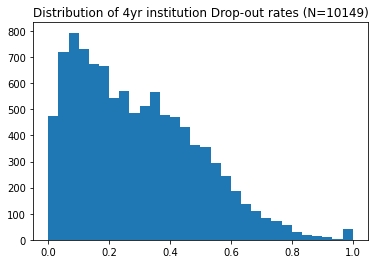

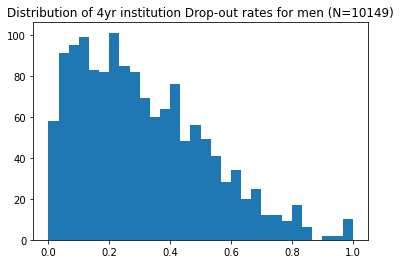

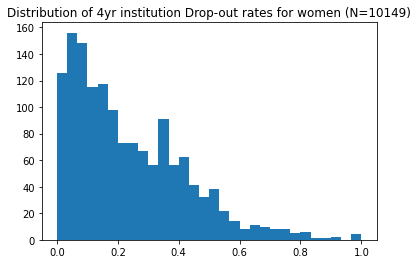

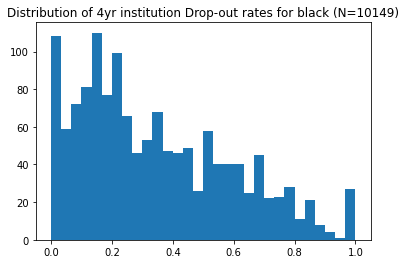

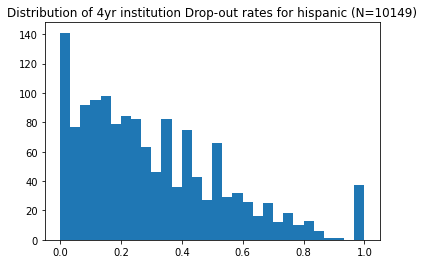

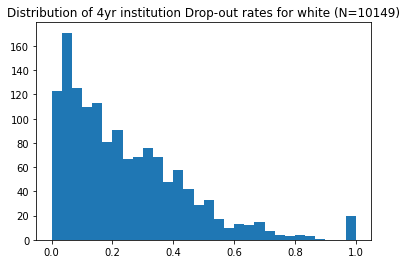

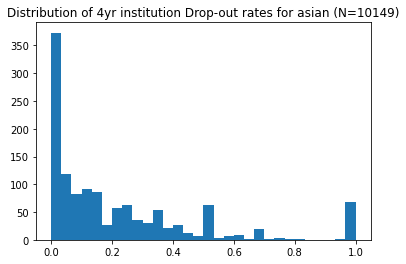

In [ ]:
# graduation rate distirbution
n_4yr = df_master.shape[0] - df_master['gradrate_4yr_total_'].isnull().sum()
n_2yr = df_master.shape[0] - df_master['gradrate_2yr_total_'].isnull().sum()

plt.hist(df_master['gradrate_4yr_nocompleter_'], 30)
plt.title("Distribution of 4yr institution Drop-out rates (N="+str(n_4yr)+")")
plt.show()

names = ['', 'men', 'women', 'black', 'hispanic', 'white', 'asian']

for i in range(1,len(names)):
  plt.hist(df_master[df_master['year']==2021]['gradrate_4yr_nocompleter_' + names[i]], 30)
  plt.title("Distribution of 4yr institution Drop-out rates for " + names[i] + " (N="+str(n_4yr)+")")
  plt.show()

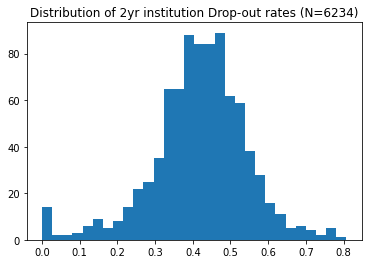

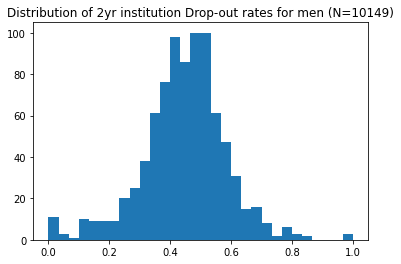

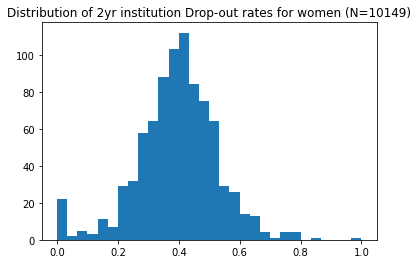

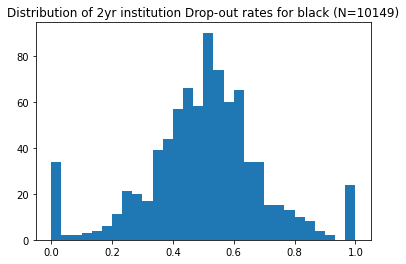

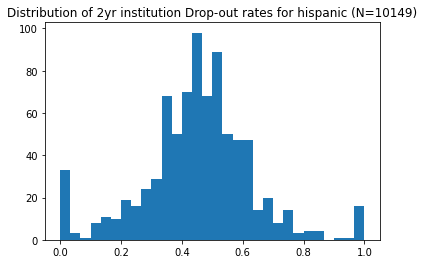

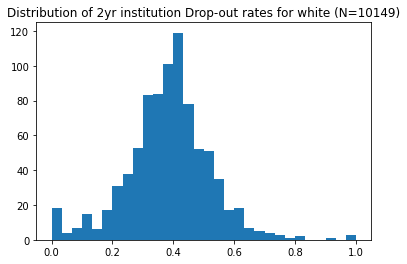

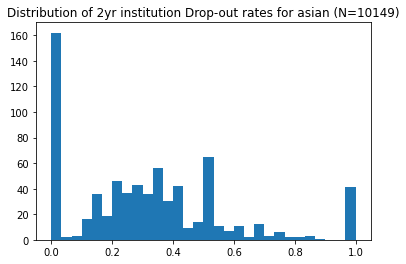

In [ ]:
plt.hist(df_master[df_master['year']==2021]['gradrate_2yr_nocompleter_'], 30)
plt.title("Distribution of 2yr institution Drop-out rates (N="+str(n_2yr)+")")
plt.show()

names = ['', 'men', 'women', 'black', 'hispanic', 'white', 'asian']

for i in range(1,len(names)):
  plt.hist(df_master[df_master['year']==2021]['gradrate_2yr_nocompleter_' + names[i]], 30)
  plt.title("Distribution of 2yr institution Drop-out rates for " + names[i] + " (N="+str(n_4yr)+")")
  plt.show()

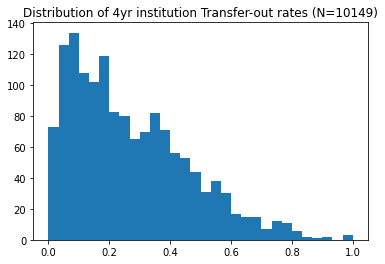

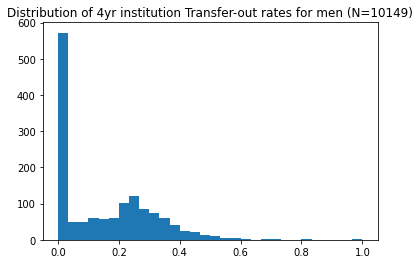

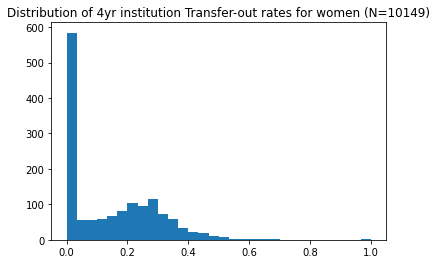

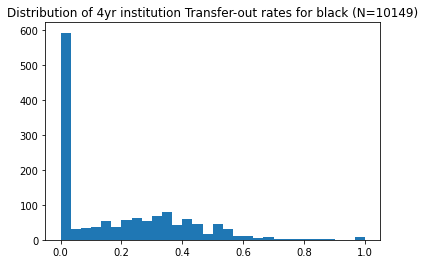

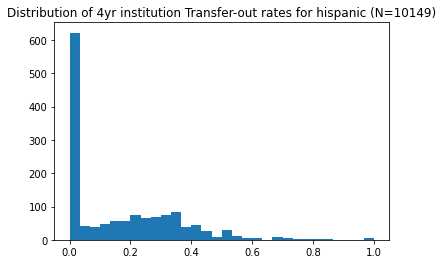

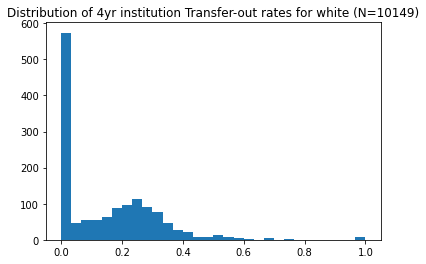

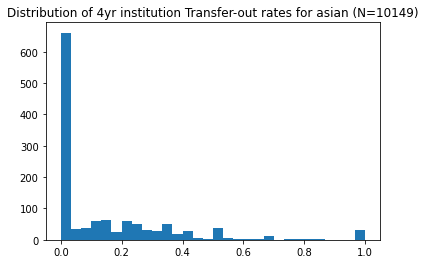

In [ ]:
plt.hist(df_master[df_master['year']==2021]['gradrate_4yr_nocompleter_'], 30)
plt.title("Distribution of 4yr institution Transfer-out rates (N="+str(n_4yr)+")")
plt.show()

names = ['', 'men', 'women', 'black', 'hispanic', 'white', 'asian']

for i in range(1,len(names)):
  plt.hist(df_master[df_master['year']==2021]['gradrate_4yr_transfer_' + names[i]], 30)
  plt.title("Distribution of 4yr institution Transfer-out rates for " + names[i] + " (N="+str(n_4yr)+")")
  plt.show()

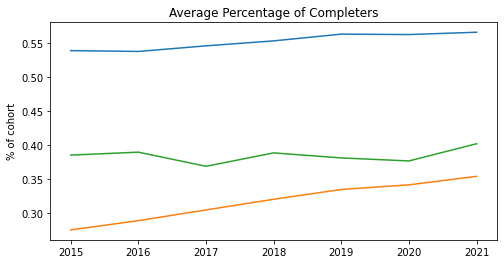

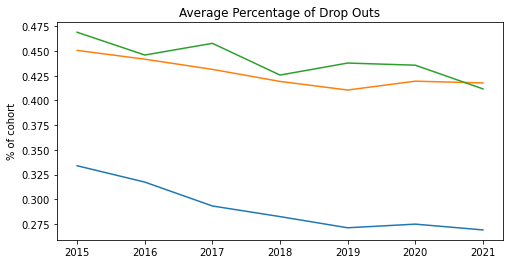

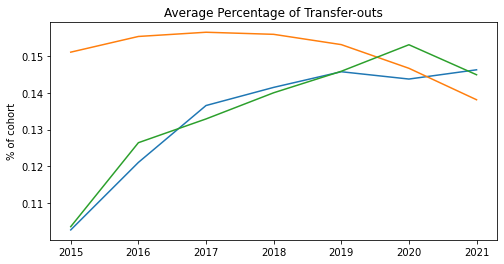

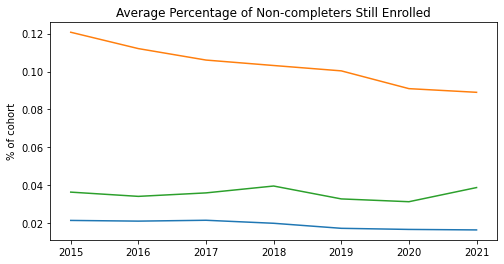

men


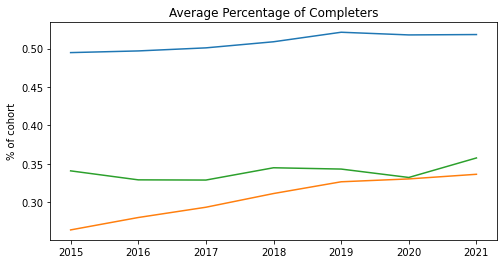

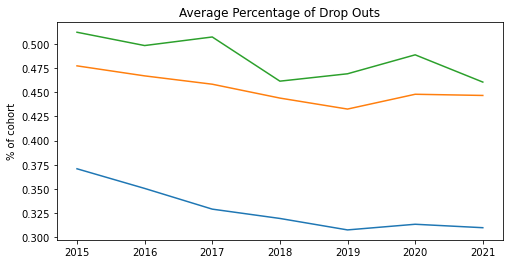

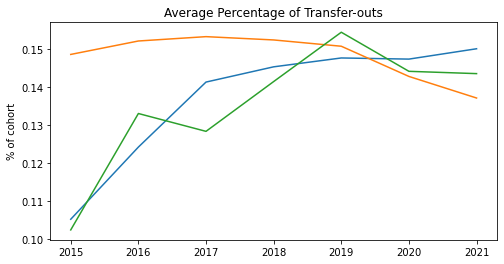

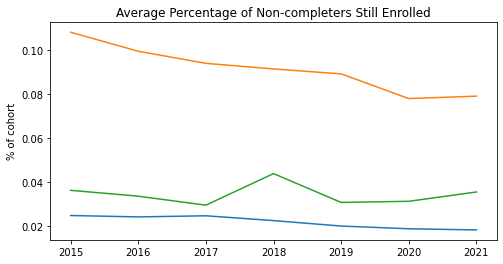

women


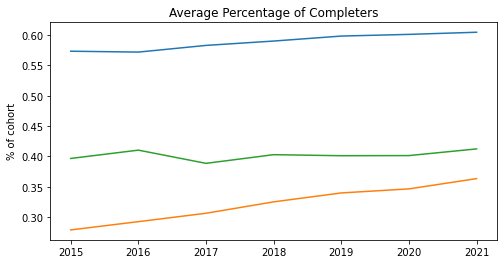

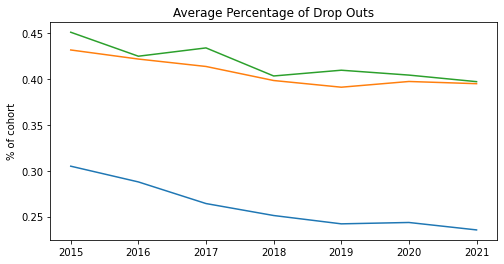

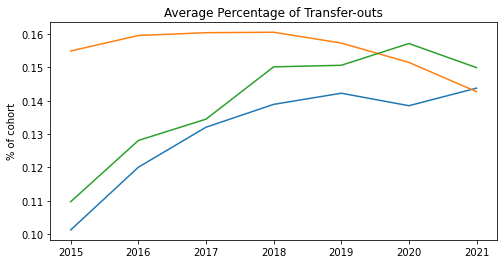

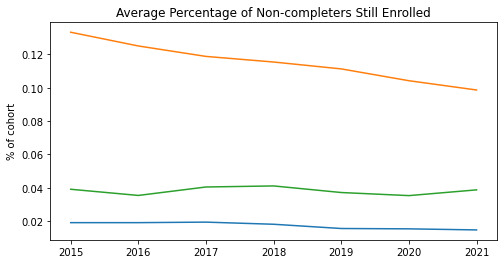

black


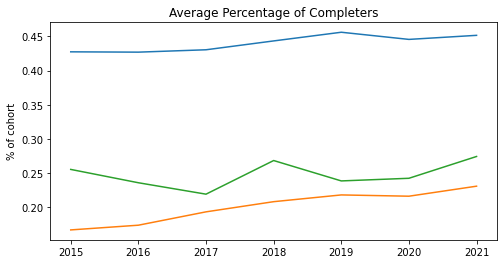

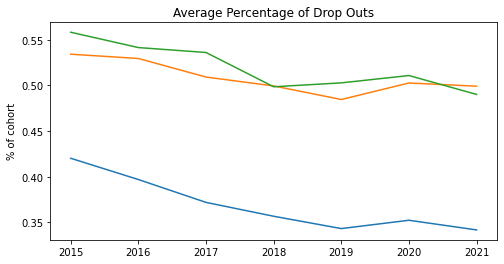

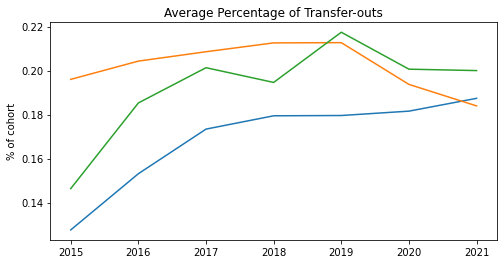

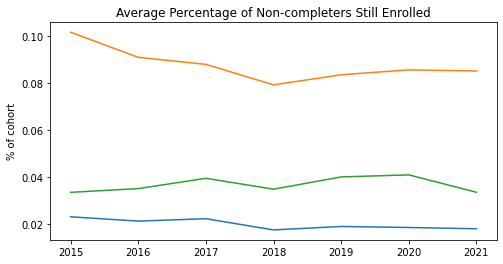

hispanic


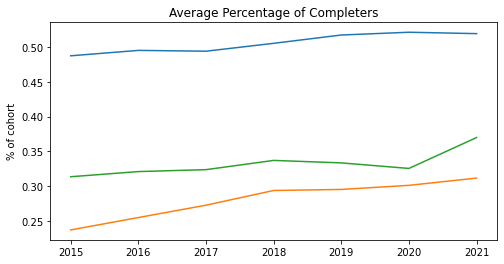

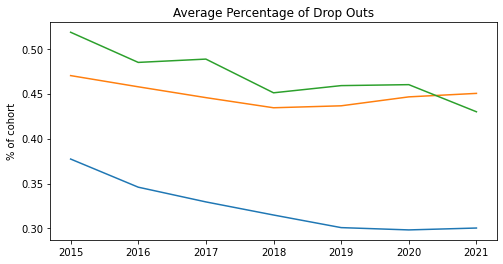

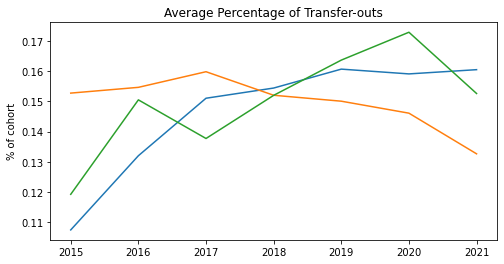

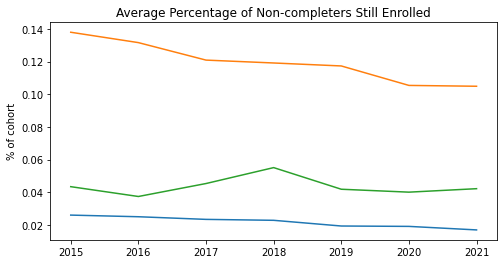

white


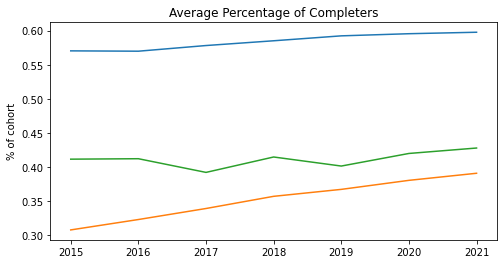

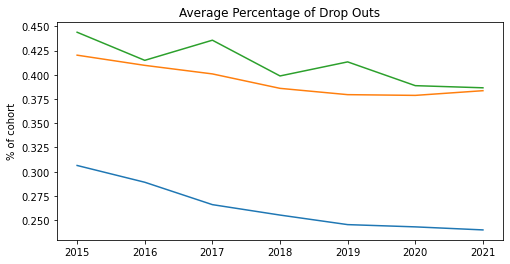

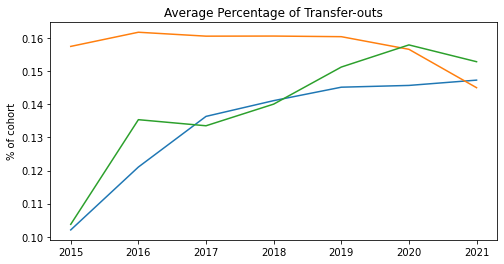

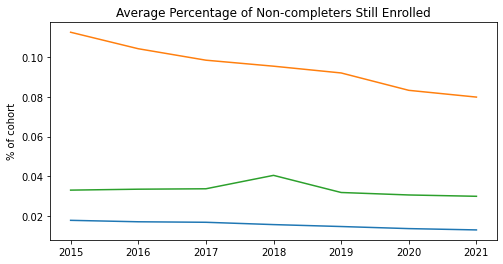

asian


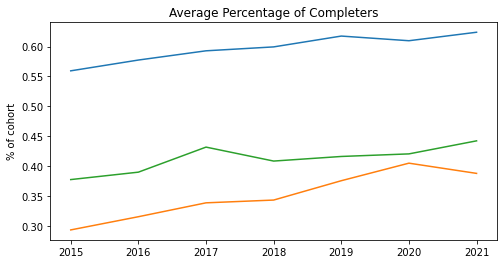

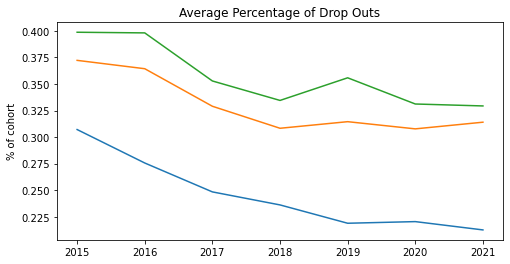

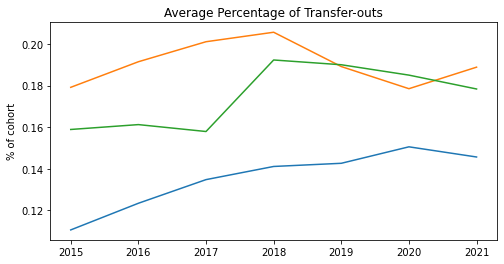

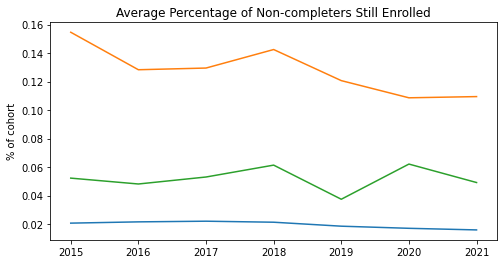

In [ ]:
# graduation rate trend over years by groups 
names = ['', 'men', 'women', 'black', 'hispanic', 'white', 'asian']
labels = ["4yr", "2yr", "other"]

for i in range(len(names)):
  print(names[i])

  plt.figure(figsize=(8,4))
  plt.title("Average Percentage of Completers")
  plt.plot(df_master_year['gradrate_4yr_completer150_' + names[i]], label=labels[0])
  plt.plot(df_master_year['gradrate_2yr_completer150_'+ names[i]], label=labels[1])
  plt.plot(df_master_year['gradrate_other_completer150_'+ names[i]], label=labels[2])
  #plt.legend()
  plt.ylabel("% of cohort")
  #plt.ylim([0.35,0.6])
  plt.show()

  plt.figure(figsize=(8,4))
  plt.title("Average Percentage of Drop Outs")
  plt.plot(df_master_year['gradrate_4yr_nocompleter_'+ names[i]], label=labels[0])
  plt.plot(df_master_year['gradrate_2yr_nocompleter_'+ names[i]], label=labels[1])
  plt.plot(df_master_year['gradrate_other_nocompleter_'+ names[i]], label=labels[2])
  #plt.legend()
  plt.ylabel("% of cohort")
  #plt.ylim([0.25,0.55])
  plt.show()

  plt.figure(figsize=(8,4))
  plt.title("Average Percentage of Transfer-outs")
  plt.plot(df_master_year['gradrate_4yr_transfer_'+ names[i]], label=labels[0])
  plt.plot(df_master_year['gradrate_2yr_transfer_'+ names[i]], label=labels[1])
  plt.plot(df_master_year['gradrate_other_transfer_'+ names[i]], label=labels[2])
  #plt.legend()
  plt.ylabel("% of cohort")
  #plt.ylim([0.,0.1])
  plt.show()

  plt.figure(figsize=(8,4))
  plt.title("Average Percentage of Non-completers Still Enrolled")
  plt.plot(df_master_year['gradrate_4yr_nocompleteren_'+ names[i]], label=labels[0])
  plt.plot(df_master_year['gradrate_2yr_nocompleteren_'+ names[i]], label=labels[1])
  plt.plot(df_master_year['gradrate_other_nocompleteren_'+ names[i]], label=labels[2])
  #plt.legend()
  plt.ylabel("% of cohort")
  #plt.ylim([0.,0.1])
  plt.show()


In [ ]:
ids_check = df_master[(df_master['gradrate_other_nocompleter_'] == 1) & (df_master['year'] == 2021)][['unitid']]

In [ ]:
ids_check.shape

(24, 1)

In [ ]:
t = ids_check.merge(df, on="unitid", how="left")

In [ ]:
t.to_csv(DATA_EXPORT_DIR + "/test.csv")

## University characteristics 

In [ ]:
df_master = pd.read_csv(DATA_EXPORT_DIR + "/df_institutional_master.csv", index_col=0)
df_master.shape

(2511, 45)

In [ ]:
df_master.columns

Index(['unitid', 'instnm', 'ialias', 'stabbr', 'zip', 'obereg', 'iclevel',
       'control', 'ugoffer', 'groffer', 'hloffer', 'rptmth', 'instcat',
       'f1systyp', 'diversity_historicallyblackcollege', 'diversity_tribal',
       'diversity_disab', 'services_hospital', 'charac_medical',
       'charac_urban', 'charac_landgrant', 'charac_instsize',
       'charac_openadmission', 'diversity_veteranprograms',
       'diversity_athleticprograms', 'charac_religion_no',
       'speclearning_distancecourse', 'speclearning_distancepogram',
       'speclearning_distanceonly', 'speclearning_parttime',
       'speclearning_studyabroad', 'speclearning_eveningcollege',
       'speclearning_rotc', 'services_remedial', 'services_counseling',
       'services_employment', 'services_placement', 'services_daycare',
       'services_library', 'services_library_physical',
       'services_library_digital', 'housing_requiredlivecampus',
       'housing_providedroom', 'housing_roomcapacity', 'housing_provi

In [ ]:
df_master[['unitid', 'control']].groupby("control").count()

,unitid
control,
Private for-profit,144
Private not-for-profit,928
Public,1439


In [ ]:
df_2021[['unitid', 'hloffer']].groupby('hloffer').count()

In [ ]:
df_master.columns

Index(['unitid', 'instnm', 'ialias', 'stabbr', 'zip', 'obereg', 'iclevel',
       'control', 'ugoffer', 'groffer', 'hloffer', 'rptmth', 'instcat',
       'f1systyp', 'diversity_historicallyblackcollege', 'diversity_tribal',
       'diversity_disab', 'services_hospital', 'charac_medical',
       'charac_urban', 'charac_landgrant', 'charac_instsize',
       'charac_openadmission', 'diversity_veteranprograms',
       'diversity_athleticprograms', 'charac_religion_no',
       'speclearning_distancecourse', 'speclearning_distancepogram',
       'speclearning_distanceonly', 'speclearning_parttime',
       'speclearning_studyabroad', 'speclearning_eveningcollege',
       'speclearning_rotc', 'services_remedial', 'services_counseling',
       'services_employment', 'services_placement', 'services_daycare',
       'services_library', 'services_library_physical',
       'services_library_digital', 'housing_requiredlivecampus',
       'housing_providedroom', 'housing_roomcapacity', 'housing_provi

In [ ]:
df_master[['unitid', 'charac_medical']].groupby("charac_medical").count()

,unitid
charac_medical,
0.0,2371
1.0,139


## University characteristics fees

In [ ]:
df_master = pd.read_csv(DATA_EXPORT_DIR + "/df_student_fee.csv", index_col=0)

In [ ]:
df_master.columns

Index(['year', 'unitid', 'fee_tuition1', 'fee_fee1', 'fee_hrchg1',
       'fee_tuition2', 'fee_fee2', 'fee_hrchg2', 'fee_tuition3', 'fee_fee3',
       'fee_hrchg3', 'fee_tuition5', 'fee_fee5', 'fee_hrchg5', 'fee_tuition6',
       'fee_fee6', 'fee_hrchg6', 'fee_tuition7', 'fee_fee7', 'fee_hrchg7',
       'fee_chg3tgtd', 'fee_chg3fgtd', 'fee_chg4ay3', 'fee_chg3ay3',
       'fee_chg6ay3', 'fee_chg7ay3', 'fee_chg8ay3'],
      dtype='object')

In [ ]:
df_master.iloc[:10,:10]

,year,unitid,fee_tuition1,fee_fee1,fee_hrchg1,fee_tuition2,fee_fee2,fee_hrchg2,fee_tuition3,fee_fee3
0,2021.0,100654,8610.0,1414.0,287.0,8610.0,1414.0,287.0,17220.0,1414.0
1,2020.0,100654,8610.0,1414.0,287.0,8610.0,1414.0,287.0,17220.0,1414.0
2,2019.0,100654,8610.0,1414.0,287.0,8610.0,1414.0,287.0,17220.0,1414.0
3,2018.0,100654,8610.0,1134.0,287.0,8610.0,1134.0,287.0,17220.0,1134.0
4,2017.0,100654,8379.0,1478.0,274.0,8379.0,1478.0,274.0,16758.0,1478.0
5,2016.0,100654,8130.0,1236.0,271.0,8130.0,1236.0,271.0,16260.0,1236.0
6,2015.0,100654,7770.0,1596.0,259.0,7770.0,1596.0,259.0,15540.0,1596.0
7,2021.0,100663,8568.0,0.0,357.0,8568.0,0.0,357.0,20400.0,0.0
8,2020.0,100663,8568.0,0.0,357.0,8568.0,0.0,357.0,20400.0,0.0
9,2019.0,100663,8568.0,0.0,357.0,8568.0,0.0,357.0,20400.0,0.0


In [ ]:
df_master_year = df_master.groupby("year").median()
df_master_year

,unitid,fee_tuition1,fee_fee1,fee_hrchg1,fee_tuition2,fee_fee2,fee_hrchg2,fee_tuition3,fee_fee3,fee_hrchg3,...,fee_tuition7,fee_fee7,fee_hrchg7,fee_chg3tgtd,fee_chg3fgtd,fee_chg4ay3,fee_chg3ay3,fee_chg6ay3,fee_chg7ay3,fee_chg8ay3
year,,,,,,,,,,,,,,,,,,,,,
2015.0,195039.5,8790.5,576.0,294.0,8926.0,576.0,298.0,13930.5,596.0,477.0,...,15240.0,432.0,691.0,0.0,0.0,1200.0,14966.0,2862.5,8652.0,3668.0
2016.0,195296.5,9000.0,600.0,300.0,9128.0,600.0,305.0,14086.0,616.0,491.5,...,15660.0,460.0,700.5,0.0,0.0,1200.0,15091.0,2887.0,8859.0,3687.0
2017.0,196033.0,9360.0,620.0,310.0,9381.0,622.0,315.0,14240.0,650.0,496.5,...,16200.0,500.0,716.0,0.0,0.0,1206.0,15305.0,2937.5,9100.0,3696.0
2018.0,196083.5,9490.0,660.0,320.0,9552.0,662.0,325.0,14400.0,696.0,500.0,...,16203.0,500.0,723.0,0.0,0.0,1220.0,15558.0,2989.0,9240.0,3754.0
2019.0,196264.0,9576.0,695.0,323.5,9790.0,700.0,329.0,14616.0,730.0,500.0,...,16128.0,549.5,726.0,0.0,0.0,1200.0,15517.5,3000.0,9514.0,3800.0
2020.0,196468.0,9827.5,715.5,329.0,9960.0,716.0,333.0,14645.5,750.0,500.0,...,16320.0,550.0,734.0,0.0,0.0,1200.0,15493.0,3026.0,9626.0,3892.0
2021.0,196565.0,10065.0,720.0,329.0,10200.0,720.0,336.5,14775.0,741.0,501.0,...,16368.0,570.0,740.0,0.0,0.0,1200.0,15718.0,3045.5,9892.0,3942.0


In [ ]:
  plt.hist(df_master['gradrate_4yr_nocompleter_' + names[i]], 30)
  plt.title("Distribution of 4yr institution Drop-out rates for " + names[i] + " (N="+str(n_4yr)+")")
  plt.show()

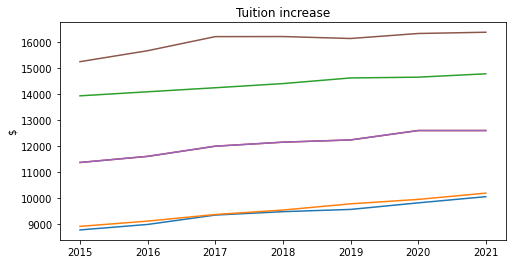

In [ ]:
  plt.figure(figsize=(8,4))
  plt.title("Tuition increase")
  plt.plot(df_master_year['fee_tuition1'])
  plt.plot(df_master_year['fee_tuition2'])
  plt.plot(df_master_year['fee_tuition3'])
  plt.plot(df_master_year['fee_tuition5'])
  plt.plot(df_master_year['fee_tuition6'])
  plt.plot(df_master_year['fee_tuition7'])
  #plt.legend()
  plt.ylabel("$")
  plt.show()

# Modeling

In [1]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

## absolute

In [ ]:
df_train = pd.read_csv(DATA_EXPORT_DIR + "/absolute/df_all_pub_train.csv")
df_test = pd.read_csv(DATA_EXPORT_DIR + "/absolute/df_all_pub_test.csv")
print(df_train.shape, df_test.shape)

(8044, 500) (2010, 500)


In [ ]:
df_train['year']

0       2015.0
1       2016.0
2       2017.0
3       2018.0
4       2019.0
         ...  
8039    2019.0
8040    2020.0
8041    2021.0
8042    2020.0
8043    2021.0
Name: year, Length: 8044, dtype: float64

In [ ]:
df_test.columns[df_test.columns.str.startswith("gradrate_4yr_completer150_")]
#vdf_test[df_test.columns[df_test.columns.str.startswith("fee")]]

Index(['gradrate_4yr_completer150_', 'gradrate_4yr_completer150_men',
       'gradrate_4yr_completer150_women', 'gradrate_4yr_completer150_black',
       'gradrate_4yr_completer150_hispanic', 'gradrate_4yr_completer150_white',
       'gradrate_4yr_completer150_asian'],
      dtype='object')

In [ ]:
predictors_finance = [
  "academic support - current year total",
"academic support - salaries and wages",
"additional (or decreased) pension expense",
"auxiliary enterprises -- current year total",
"auxiliary enterprises -- salaries and wages",
"institutional support - current year total",
"institutional support - salaries and wages",
"instruction - current year total",
"instruction - salaries and wages",
"public service - current year total",
"public service - salaries and wages",
"scholarships and fellowships expenses -- current year total",
"total gross scholarships and fellowships",
"student services - current year total",
"student services - salaries and wages",
 ]

predictors_finance = ["finance_" + col for col in predictors_finance]

predictors_finaid = [
    'finaid_scugrad', 'finaid_uagrntp',
    'finaid_uagrntt','finaid_upgrntp', 
    'finaid_upgrntt', 'finaid_ufloanp', 
    'finaid_ufloant', 'finaid_ugpo9_t',
    'finaid_ugpo9_a', 'finaid_gpo9_t', 'finaid_gpo9_a',
    'finaid_po9_t', 'finaid_po9_a', 
    'finaid_ugdod_t', 'finaid_ugdod_a', 
    'finaid_gdod_t', 'finaid_gdod_a', 'finaid_dod_t'
]

predictors_fee = [
    'fee_tuition1', 'fee_fee1', 'fee_hrchg1', 'fee_tuition2', 'fee_fee2',
       'fee_hrchg2', 'fee_tuition3', 'fee_fee3', 'fee_hrchg3', 'fee_tuition5',
       'fee_fee5', 'fee_hrchg5', 'fee_tuition6', 'fee_fee6', 'fee_hrchg6',
       'fee_tuition7', 'fee_fee7', 'fee_hrchg7', 'fee_chg3tgtd',
       'fee_chg3fgtd', 'fee_chg4ay3', 'fee_chg3ay3', 'fee_chg6ay3',
       'fee_chg7ay3', 'fee_chg8ay3'
]

covariates = [] # "time"
covariates += df_test.columns[df_test.columns.str.startswith("charac")].tolist()
covariates += df_test.columns[df_test.columns.str.startswith("diversity")].tolist()
covariates += df_test.columns[df_test.columns.str.startswith("services")].tolist()
covariates += df_test.columns[df_test.columns.str.startswith("speclearning")].tolist()

print(len(predictors_finance), len(predictors_fee), len(predictors_finaid))
print(len(covariates))

predictors = predictors_finance + predictors_fee + predictors_finaid

15 25 18
27


In [ ]:
covariates

['charac_medical',
 'charac_urban',
 'charac_landgrant',
 'charac_instsize',
 'charac_openadmission',
 'charac_religion_no',
 'diversity_historicallyblackcollege',
 'diversity_tribal',
 'diversity_disab',
 'diversity_veteranprograms',
 'diversity_athleticprograms',
 'services_hospital',
 'services_remedial',
 'services_counseling',
 'services_employment',
 'services_placement',
 'services_daycare',
 'services_library',
 'services_library_physical',
 'services_library_digital',
 'speclearning_distancecourse',
 'speclearning_distancepogram',
 'speclearning_distanceonly',
 'speclearning_parttime',
 'speclearning_studyabroad',
 'speclearning_eveningcollege',
 'speclearning_rotc']

***Train: (3101, 85)    Test: (697, 85)


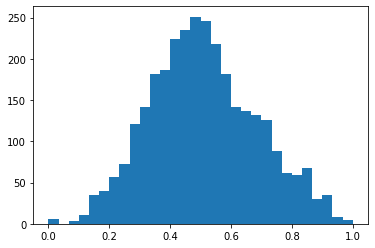

In [ ]:
y_train = df_train['gradrate_4yr_completer150_']
y_test = df_test['gradrate_4yr_completer150_']
X_train = df_train[predictors + covariates][~y_train.isnull()]
X_test = df_test[predictors + covariates][~y_test.isnull()]
y_train = np.asarray(y_train[~y_train.isnull()])
y_test = np.asarray(y_test[~y_test.isnull()])
print("***Train:", X_train.shape, "   Test:", X_test.shape)
plt.hist(y_train, 30)
plt.show()

In [ ]:
X_train.isnull().sum()[:10]

finance_academic support - current year total           491
finance_academic support - salaries and wages           491
finance_additional (or decreased) pension expense      1162
finance_auxiliary enterprises -- current year total     491
finance_auxiliary enterprises -- salaries and wages     491
finance_institutional support - current year total      491
finance_institutional support - salaries and wages      491
finance_instruction - current year total                491
finance_instruction - salaries and wages                491
finance_public service - current year total             491
dtype: int64

In [ ]:
X_train.isnull().sum()[-10:]

services_library               7
services_library_physical      7
services_library_digital       7
speclearning_distancecourse    7
speclearning_distancepogram    7
speclearning_distanceonly      7
speclearning_parttime          7
speclearning_studyabroad       7
speclearning_eveningcollege    7
speclearning_rotc              7
dtype: int64

In [ ]:
X_train.isnull().sum(axis=1).value_counts()[:10]

2     785
3     627
4     396
17    263
5     155
18    126
6     119
16    103
19     74
15     61
dtype: int64

In [ ]:
#X_train.fillna(X_train.median(), inplace=True)
#X_test.fillna(X_test.median(), inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MSE = 0.010   Corr = 0.822
MSE = 0.010   Corr = 0.796


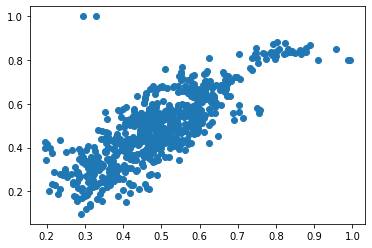

In [ ]:
#model = PLSRegression(n_components=10)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(f"MSE ={ mean_squared_error(y_train, y_pred.flatten()) : .3f}   Corr ={np.corrcoef(y_train, y_pred.flatten())[0][1]: .3f}")
y_pred = model.predict(X_test)
print(f"MSE ={ mean_squared_error(y_test, y_pred.flatten()) : .3f}   Corr ={np.corrcoef(y_test, y_pred.flatten())[0][1]: .3f}")
plt.scatter(y_pred, y_test)
plt.show()

In [ ]:
coefs = pd.DataFrame(model.coef_, index=predictors+covariates)
coefs.columns = ["linear regression coef"]

In [ ]:
coefs.sort_values("linear regression coef", ascending=False)[:20]

,linear regression coef
finaid_ugdod_t,4.393434e+11
finaid_ugpo9_t,2.138978e+11
finaid_gpo9_t,8.834271e+10
finaid_gdod_t,3.843127e+10
diversity_tribal,5.714554e+08
speclearning_distanceonly,3.717251e+04
fee_hrchg1,2.156248e+00
fee_fee1,1.389842e+00
fee_tuition2,9.765656e-01
fee_fee6,7.141113e-01


In [ ]:
coefs.sort_values("linear regression coef", ascending=True)[:20]

,linear regression coef
finaid_po9_t,-2.008492e+11
finaid_dod_t,-1.922638e+10
diversity_tribal,-2.521750e+09
speclearning_distanceonly,-2.857881e+05
fee_fee2,-4.354112e+00
fee_tuition5,-1.873182e+00
fee_hrchg2,-1.092033e+00
fee_fee5,-6.088638e-01
fee_tuition1,-4.326299e-01
fee_hrchg5,-7.291852e-02


MSE = 0.014   Corr = 0.747
MSE = 0.013   Corr = 0.726


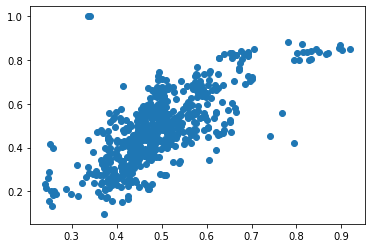

In [ ]:
model = PCA(n_components=10)
U_train = model.fit_transform(X_train)
U_test = model.transform(X_test)
model = LinearRegression()
model.fit(U_train, y_train)

y_pred = model.predict(U_train)
print(f"MSE ={ mean_squared_error(y_train, y_pred.flatten()) : .3f}   Corr ={np.corrcoef(y_train, y_pred.flatten())[0][1]: .3f}")
y_pred = model.predict(U_test)
print(f"MSE ={ mean_squared_error(y_test, y_pred.flatten()) : .3f}   Corr ={np.corrcoef(y_test, y_pred.flatten())[0][1]: .3f}")
plt.scatter(y_pred, y_test)
plt.show()

## relative

In [2]:
df_train = pd.read_csv(DATA_EXPORT_DIR + "/relative/df_all_pub_train.csv")
df_test = pd.read_csv(DATA_EXPORT_DIR + "/relative/df_all_pub_test.csv")
print(df_train.shape, df_test.shape)

NameError: ignored

In [ ]:
df_test.columns[df_test.columns.str.startswith("gradrate_4yr_completer150_")]

Index(['gradrate_4yr_completer150_men', 'gradrate_4yr_completer150_women',
       'gradrate_4yr_completer150_black', 'gradrate_4yr_completer150_hispanic',
       'gradrate_4yr_completer150_white', 'gradrate_4yr_completer150_asian'],
      dtype='object')

In [ ]:
predictors_finance = [
  "academic support - current year total",
"academic support - salaries and wages",
"additional (or decreased) pension expense",
"auxiliary enterprises -- current year total",
"auxiliary enterprises -- salaries and wages",
"institutional support - current year total",
"institutional support - salaries and wages",
"instruction - current year total",
"instruction - salaries and wages",
"public service - current year total",
"public service - salaries and wages",
"scholarships and fellowships expenses -- current year total",
"total gross scholarships and fellowships",
"student services - current year total",
"student services - salaries and wages",
 ]

predictors_finance = ["finance_" + col for col in predictors_finance]

predictors_fee = [
    'fee_tuition1', 'fee_fee1', 'fee_hrchg1', 'fee_tuition2', 'fee_fee2',
       'fee_hrchg2', 'fee_tuition3', 'fee_fee3', 'fee_hrchg3', 'fee_tuition5',
       'fee_fee5', 'fee_hrchg5', 'fee_tuition6', 'fee_fee6', 'fee_hrchg6',
       'fee_tuition7', 'fee_fee7', 'fee_hrchg7', 'fee_chg3tgtd',
       'fee_chg3fgtd', 'fee_chg4ay3', 'fee_chg3ay3', 'fee_chg6ay3',
       'fee_chg7ay3', 'fee_chg8ay3'
]

covariates = [] 
covariates += df_test.columns[df_test.columns.str.startswith("charac")].tolist()
covariates += df_test.columns[df_test.columns.str.startswith("diversity")].tolist()
covariates += df_test.columns[df_test.columns.str.startswith("services")].tolist()
covariates += df_test.columns[df_test.columns.str.startswith("speclearning")].tolist()

print(len(predictors_finance), len(predictors_fee), len(predictors_finaid))
print(len(covariates))

predictors = predictors_finance + predictors_fee + predictors_finaid

15 25 18
27


***Train: (2013, 85)    Test: (468, 85)


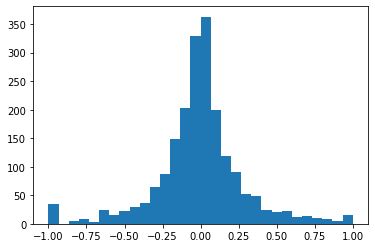

In [ ]:
y_train = df_train['gradrate_4yr_completer150_black']
y_test = df_test['gradrate_4yr_completer150_black']
X_train = df_train[predictors + covariates][~y_train.isnull()]
X_test = df_test[predictors + covariates][~y_test.isnull()]
y_train = np.asarray(y_train[~y_train.isnull()])
y_test = np.asarray(y_test[~y_test.isnull()])
print("***Train:", X_train.shape, "   Test:", X_test.shape)
plt.hist(y_train, 30)
plt.show()

In [ ]:
X_train.isnull().sum(axis=1).value_counts()[:10]

4     305
3     282
2     239
5     197
6     144
17    131
18    100
7      93
8      82
19     80
dtype: int64

In [ ]:
X_train.isnull().sum()[:20]

finance_academic support - current year total                           434
finance_academic support - salaries and wages                           439
finance_additional (or decreased) pension expense                      1029
finance_auxiliary enterprises -- current year total                     436
finance_auxiliary enterprises -- salaries and wages                     449
finance_institutional support - current year total                      438
finance_institutional support - salaries and wages                      442
finance_instruction - current year total                                430
finance_instruction - salaries and wages                                432
finance_public service - current year total                             474
finance_public service - salaries and wages                             491
finance_scholarships and fellowships expenses -- current year total     484
finance_total gross scholarships and fellowships                        433
finance_stud

In [ ]:
#X_train.fillna(X_train.median(), inplace=True)
#X_test.fillna(X_test.median(), inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
np.min(np.min(X_train))

-137.55538367574826

In [ ]:
model = PLSRegression(n_components=10)
#model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(f"MSE ={ mean_squared_error(y_train, y_pred.flatten()) : .3f}   Corr ={np.corrcoef(y_train, y_pred.flatten())[0][1]: .3f}")
y_pred = model.predict(X_test)
print(f"MSE ={ mean_squared_error(y_test, y_pred.flatten()) : .3f}   Corr ={np.corrcoef(y_test, y_pred.flatten())[0][1]: .3f}")


MSE = 0.080   Corr = 0.255
MSE = 0.082   Corr = 0.072


MSE = 0.084   Corr = 0.144
MSE = 0.078   Corr = 0.146


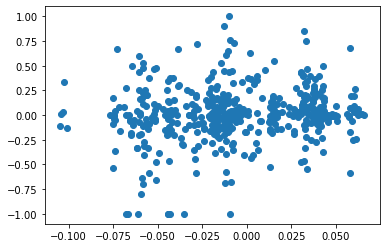

In [ ]:
model = PCA(n_components=10)
U_train = model.fit_transform(X_train)
U_test = model.transform(X_test)
model = LinearRegression()
model.fit(U_train, y_train)

y_pred = model.predict(U_train)
print(f"MSE ={ mean_squared_error(y_train, y_pred.flatten()) : .3f}   Corr ={np.corrcoef(y_train, y_pred.flatten())[0][1]: .3f}")
y_pred = model.predict(U_test)
print(f"MSE ={ mean_squared_error(y_test, y_pred.flatten()) : .3f}   Corr ={np.corrcoef(y_test, y_pred.flatten())[0][1]: .3f}")
plt.scatter(y_pred, y_test)
plt.show()